# LEAD SCORING CASE STUDY <br> - `R.MADHAVAN`

## Importing basic libraries used for Data Manipulation and EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy

import warnings
warnings.filterwarnings('ignore')

## Loading our dataset

In [2]:
x_edu = pd.read_csv('/Users/madhavan/Desktop/new /Machine learning 1/lead_score_CASE/Leads.csv')

### Taking a look at head, shape, info of the dataframe 

In [3]:
x_edu.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### We can see that both 'Lead Profile' and 'City' has select. Lets get back to the issue

In [4]:
shape_init = x_edu.shape[:]
shape_init

(9240, 37)

### We have 37 columns and 9240 rows which implies there are 9240 initial pool of leads 

In [5]:
x_edu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
x_edu['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

### We have observed while looking at the head that 2 columns have 'Select' in them. Let's see how many columns contain select in total

In [7]:
select_col = 0

for x in x_edu.columns:
    if 'Select' in x_edu[x].unique():
        select_col += 1

select_col        

4

### Four columns in total have 'Select' in them. After looking at the data dictionary and business perspective we can figure out that 'Select' are actually null values (a lead didnot fill the option)

In [8]:
x_edu = x_edu.replace('Select',np.nan)

### Lets check the % of missing values in each column

In [9]:
missing = round(x_edu.isnull().mean() * 100,2).sort_values(ascending = False)
missing

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

### Lets take a look at the columns which has more than 50% of missing values

In [10]:
more_50 = x_edu[missing[missing > 50].index]
more_50

,How did you hear about X Education,Lead Profile,Lead Quality
0,NaN,NaN,Low in Relevance
1,NaN,NaN,NaN
2,NaN,Potential Lead,Might be
3,Word Of Mouth,NaN,Not Sure
4,Other,NaN,Might be
...,...,...,...
9235,NaN,Potential Lead,High in Relevance
9236,NaN,Potential Lead,Might be
9237,NaN,Potential Lead,Not Sure
9238,Online Search,NaN,NaN


### Let's do univariate categorical analysis of these columns (along with null) and check if we can impute null values with mode

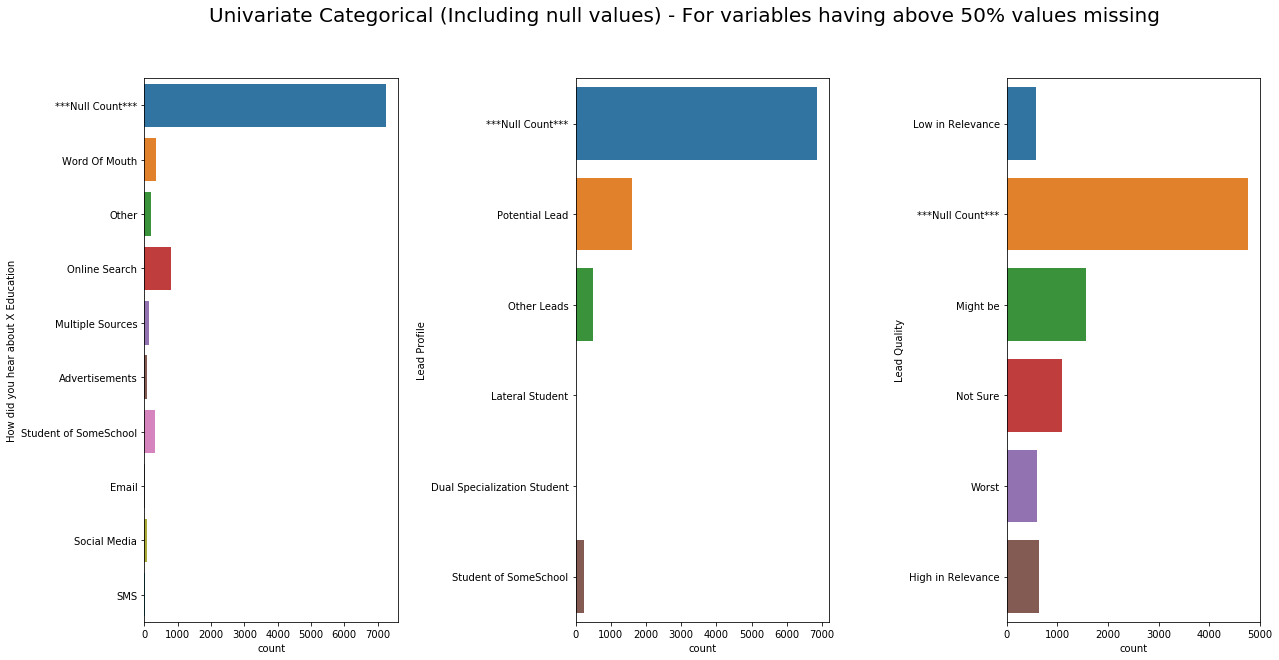

In [11]:
plt.figure(figsize= (20,10))
c = 1
for x in more_50.columns:
    plt.subplot(1,3,c)
    only_col = x_edu[x].replace(np.nan,'***Null Count***')
    sns.countplot(y = only_col )
    c +=1 
plt.subplots_adjust(wspace= 0.7)


plt.suptitle('Univariate Categorical (Including null values) - For variables having above 50% values missing' , size = 20 )
plt.subplots_adjust(hspace= 0.5)
    

### As we have more than 50% null values in these columns and mode imputation here being a bad idea(creates imbalance) lets choose to drop these columns and check missing values again

In [12]:
x_edu = x_edu[missing[missing < 50].index]
missing = round(x_edu.isnull().mean() * 100,2).sort_values(ascending = False)
missing.head(10)

Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
dtype: float64

### Assymetrique columns are index and score assigned to each customer based on their activity and their profile.The missing value % is same for all these columns indicating same rows may be missing for all these columns

In [13]:
clump_45 = x_edu[missing[missing == 45.65].index]
clump_45.head()

,Asymmetrique Profile Score,Asymmetrique Activity Score,Asymmetrique Profile Index,Asymmetrique Activity Index
0,15.0,15.0,02.Medium,02.Medium
1,15.0,15.0,02.Medium,02.Medium
2,20.0,14.0,01.High,02.Medium
3,17.0,13.0,01.High,02.Medium
4,18.0,15.0,01.High,02.Medium


### Lets check the spread and frequency of these columns 

Text(0.5, 0.98, 'Spread of the features related to Asymmetrique Profile and Activity')

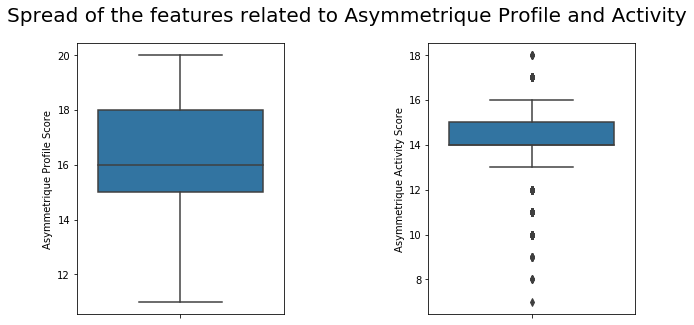

In [14]:
plt.figure(figsize= (10,5))
c = 1
for x in clump_45.filter(like = 'Score').columns: #filtering only columns having 'Score' in it
    plt.subplot(1,2,c)
    sns.boxplot(y= x_edu[x] )
    c +=1 
plt.subplots_adjust(wspace= 0.7)
plt.suptitle('Spread of the features related to Asymmetrique Profile and Activity' , size = 20 )


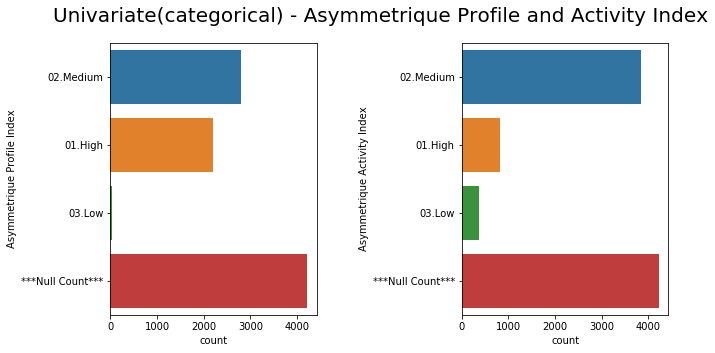

In [15]:
plt.figure(figsize= (10,5))
c = 1
for x in clump_45.filter(like = 'Index').columns: #filtering only columns having 'index' in it
    plt.subplot(1,2,c)
    only_col = x_edu[x].replace(np.nan,'***Null Count***')
    sns.countplot(y= only_col )
    c +=1 
plt.suptitle('Univariate(categorical) - Asymmetrique Profile and Activity Index' , size = 20 )
plt.subplots_adjust(hspace= 0.5)
plt.subplots_adjust(wspace= 0.7)

### Let's drop these columns as imputation may introduce bias

In [16]:
x_edu = x_edu[x_edu.columns.difference(clump_45.columns)]
missing = round(x_edu.isnull().mean() * 100,2).sort_values(ascending = False)
missing.head(7)

City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
dtype: float64

### Lets check the columns which has more than 25% missing values

In [17]:
cat_miss = x_edu[missing[missing > 25].index]
cat_miss.head()

,City,Specialization,Tags,What matters most to you in choosing a course,What is your current occupation,Country
0,NaN,NaN,Interested in other courses,Better Career Prospects,Unemployed,NaN
1,NaN,NaN,Ringing,Better Career Prospects,Unemployed,India
2,Mumbai,Business Administration,Will revert after reading the email,Better Career Prospects,Student,India
3,Mumbai,Media and Advertising,Ringing,Better Career Prospects,Unemployed,India
4,Mumbai,NaN,Will revert after reading the email,Better Career Prospects,Unemployed,India


### As all are categorical columns let's check their frequency and see if any kind of imputation is possible

Text(0.5, 0.98, 'Countplot of important categorical columns')

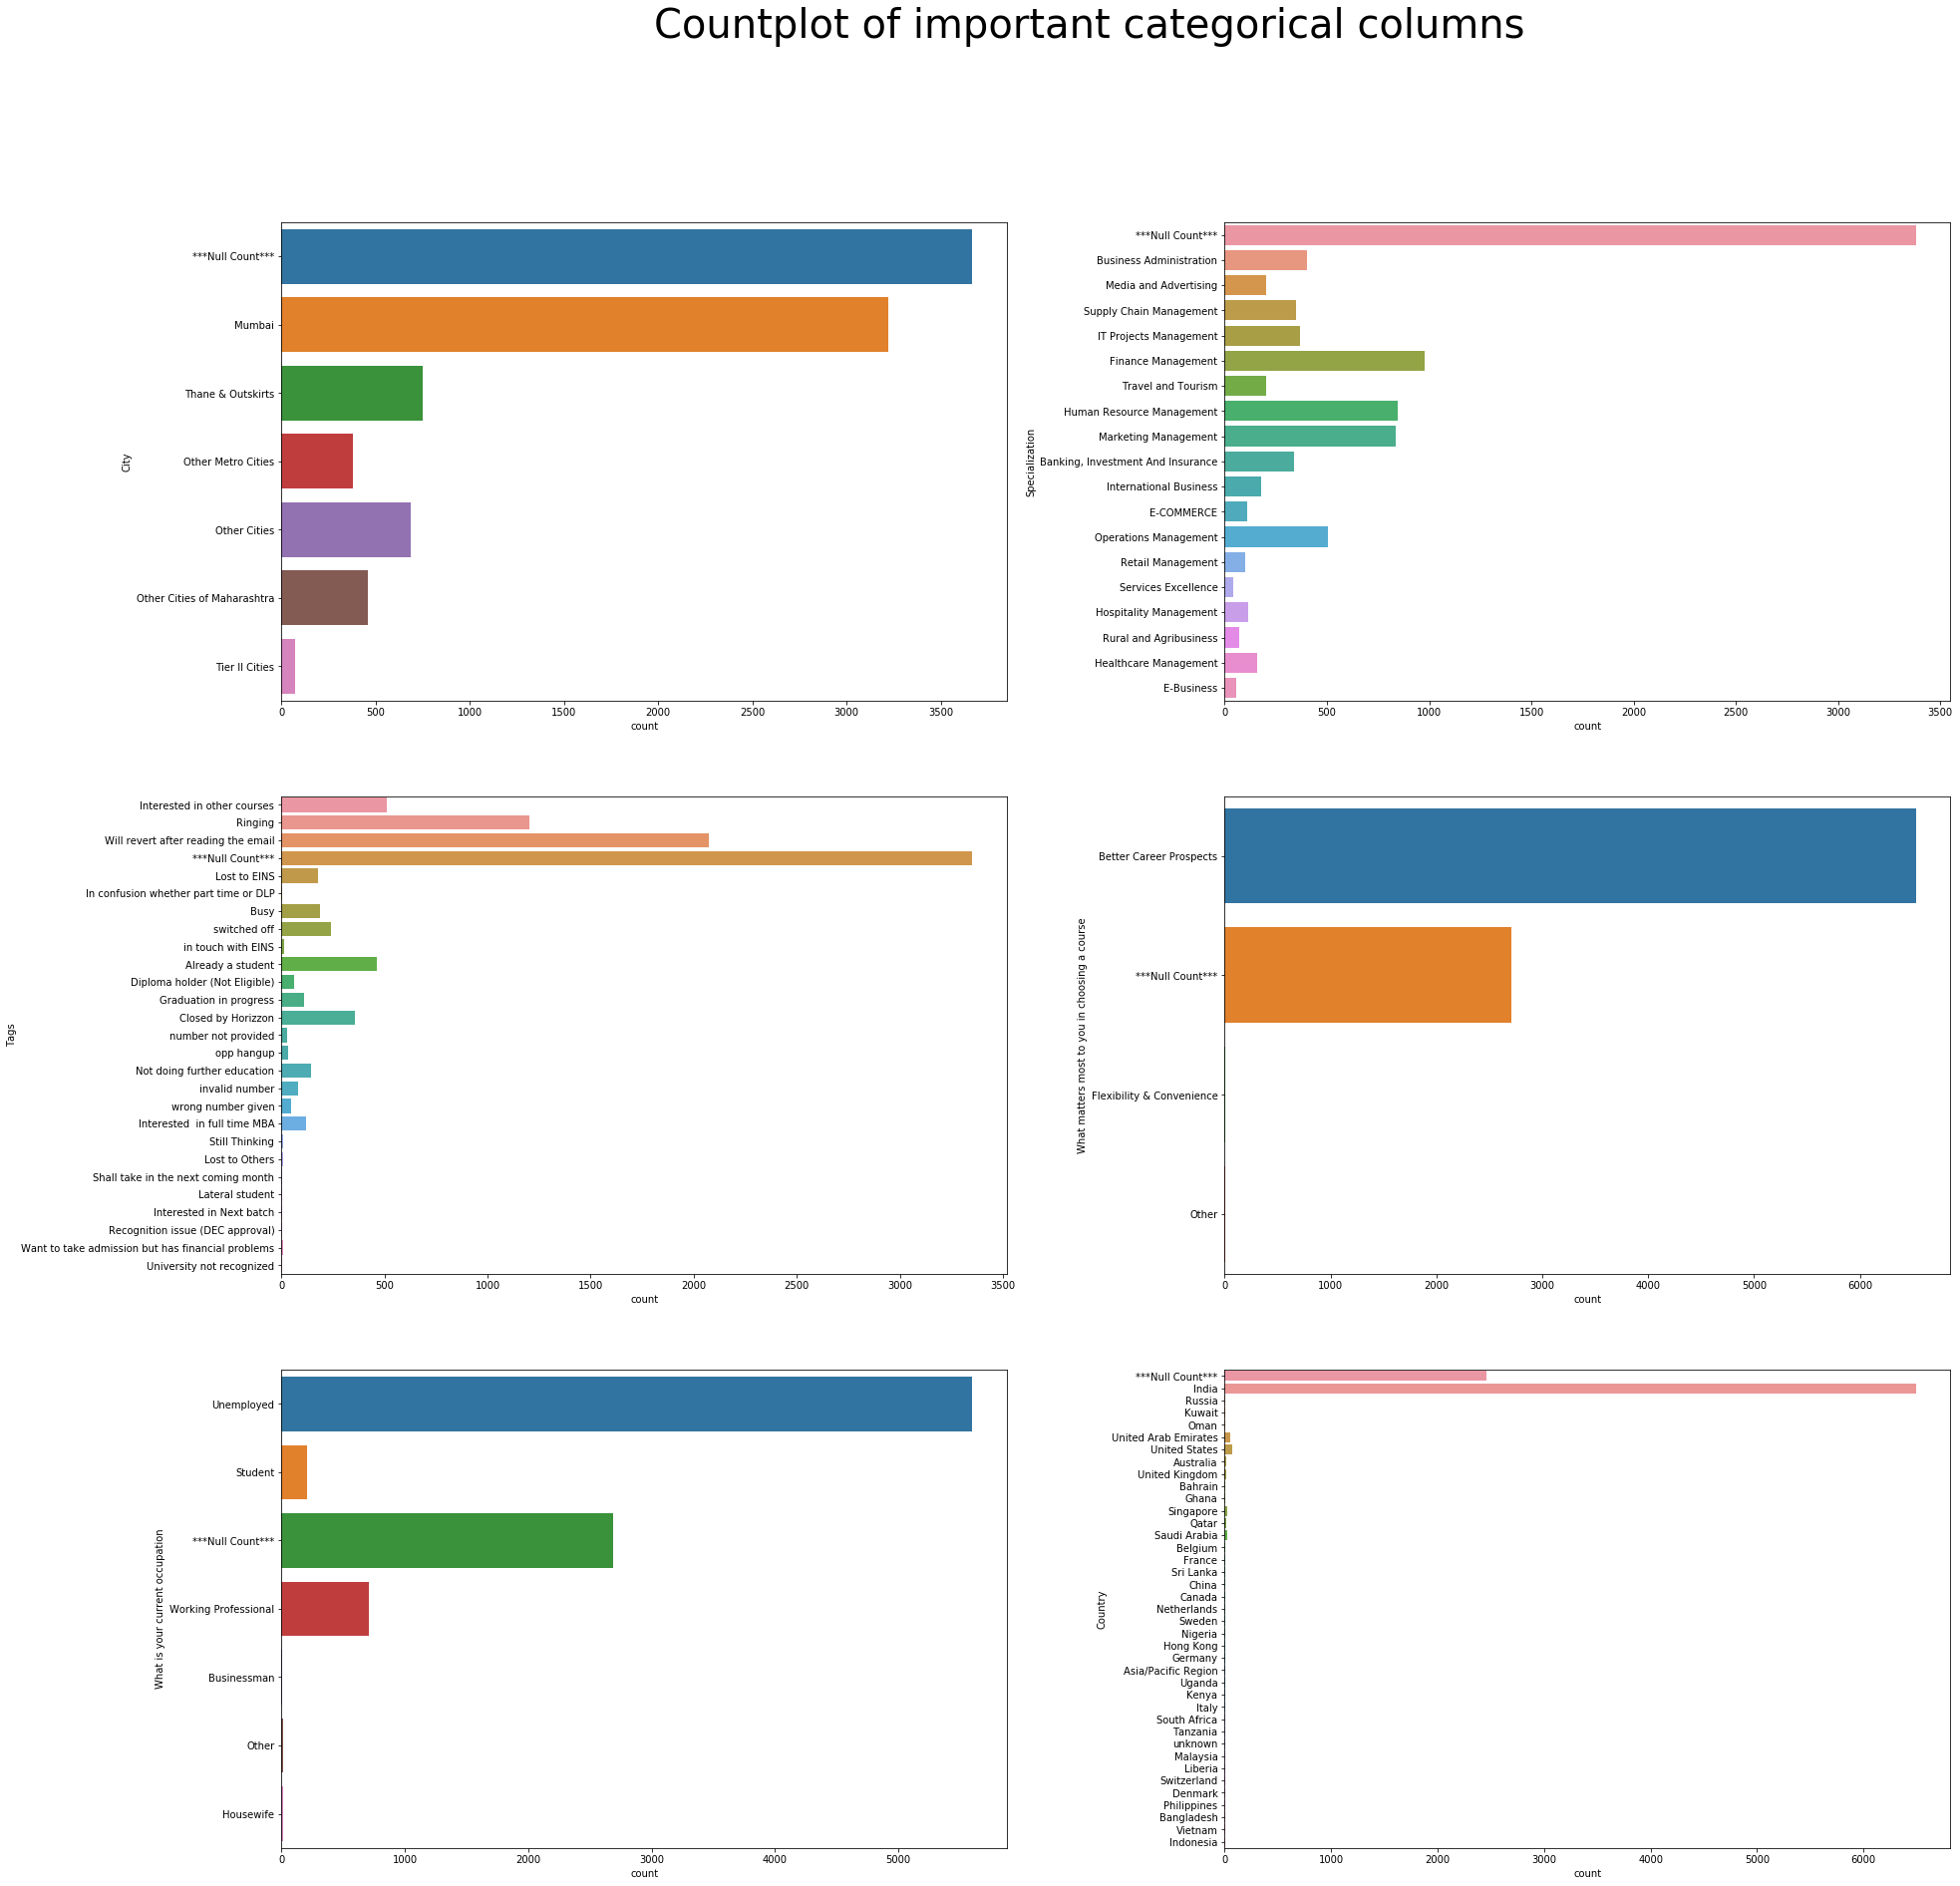

In [18]:
plt.figure(figsize= (30,30))
c = 1
for x in cat_miss.columns:
    plt.subplot(3,2,c)
    only_col = x_edu[x].replace(np.nan,'***Null Count***')
    sns.countplot(y= only_col)
    c +=1 
plt.subplots_adjust(wspace= 0.3)
plt.suptitle('Countplot of important categorical columns' , size = 40 )


### A small java script helping to output whole plot without having to scroll

In [19]:

%%javascript   
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}



<IPython.core.display.Javascript object>

## `Let's do segmented univariate analysis of those columns to check if there are any underlying patterns in the data. This will help us to see how these categories are behaving for people who have 'Converted' and people who have not converted`

## AS THE DATA IS IMBALANCED SIMPLY PLOTTING CATEGORIES WITH HUE AS 'CONVERTED' WILL NOT GIVE A CLEAR PICTURE. INSTEAD PLOTTING % DISTRIBUTION OF CATEGORIES FOR 'CONVERTED' AND 'NOT-CONVERTED' WILL BE A BETTER PICTURIZATION TO OBSERVE PATTERNS

Text(0.5, 0.98, '% DISTRIBUTION OF CATEGORIES ACROSS CONVERTED ( TARGET VARIABLE)')

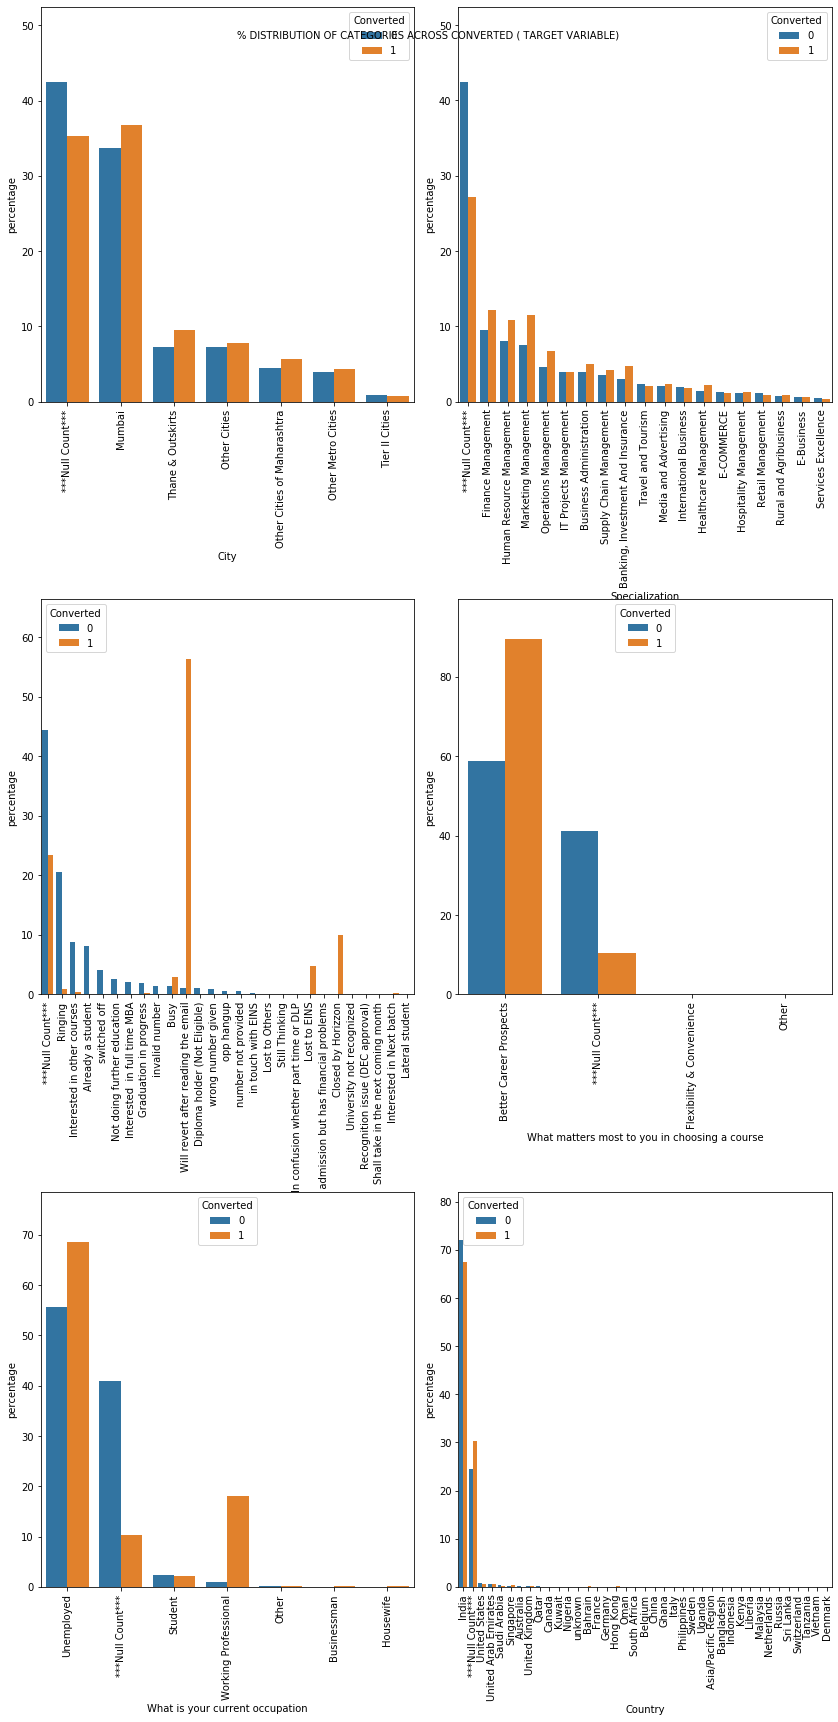

In [20]:
c = 1

plt.figure(figsize = (12,24))
for x in cat_miss.columns: #consisting categorical columns
        plt.subplot(3,2,c)
        
        # grouping data based on Target column i.e Converted , counting values, converting into % and then plotting it
        
        ccu = x_edu.replace(np.nan,'***Null Count***').groupby(['Converted'])[x].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
        sns.barplot(y = 'percentage' ,x = x,data = ccu,hue = 'Converted')
        plt.ylim(0,ccu['percentage'].max() + 10)
        plt.tight_layout()
        plt.xticks(rotation = 90) #rotating for easy visibility
        c += 1
        
plt.subplots_adjust(hspace= 0.5)
plt.suptitle('% DISTRIBUTION OF CATEGORIES ACROSS CONVERTED ( TARGET VARIABLE)' , size = 10)


### FROM THE ABOVE PLOTS WE GET A LOT OF INTERESTING OBSERVATIONS. ALMOST 60% OF THE PEOPLE WHO HAVE 'CONVERTED' REPLIED BACK SAYING 'WILL RESPOND AFTER READING THE EMAIL'. SO WE CAN UNDERSTAND A PERSON REPLYING IN THIS WAY HAS A CRUCIAL CHANCE OF BEING CONVERTED AND DEFINITELY IS A POTENTIAL LEAD.

## 1) 'Tags' is a column which is generated after the sales team gets in touch with the lead but as we can see in the plot it can be served as a very very important variable to build the model. Infact it is observed to be the most crucial indicator for 'conversion'.
## 2) Also the chief goal of this project is to pick up 'hot leads' from the initial pool of leads so that the sales team can focus more on 'nurturing' the 'hot leads' rather than focusing on everyone. In such case we can use the power of the 'tags' variable to fit a better model and assign lead score to the current data.
## 3) But what if this model is used in the future? What if the sales team wishes to target the 'hot leads' directly without even getting in touch with the initial pool of leads. It is also important that we a build a model that can get adjusted to future requirements.
## 4) Thus from this step onwards we will proceed we will focus on building 2 models
   ## a) `Model A focuses on prediction where we intend to build a model which has 'Tags' in it , see the variables which has positive effect on the lead conversion(and how much effect) and assign lead scores for the current data`
   ## b) `Model B focuses on forecasting for the future . 'Tags' feature is not present in this. Here our goal is to project for the future. We are not concerned about how many features we are using`
   
# `From this point onwards , while doing Eda and feature manipulation we will consider both the approaches in mind and do our steps accordingly`



### ** The variable specialization assigned to 'temp1' can be used for model B as model A can capture enough predictive power from tags variable which we are going to transform **

In [21]:
temp1 = x_edu['Specialization'].replace(np.nan, 'Info not provided').map({'Info not provided':'Info not provided'}).replace(np.nan,'Info given')


### LETS MAKE A NEW VARIABLE 'Status_reply after email' which has only two classes. This way we are also indirectly dealing with null values 

In [22]:
x_edu['Status_reply after email'] = x_edu['Tags'].map({'Will revert after reading the email': 'Will revert after reading the email' }).replace(np.nan,'Other')
del x_edu['Tags']
x_edu['Status_reply after email'].value_counts()

Other                                  7168
Will revert after reading the email    2072
Name: Status_reply after email, dtype: int64

### Using same logic as earlier explained we make a variable 'What_matters_BETTER_CAREER' which has 2 classes (missing values = 'Not Selected')

In [23]:
x_edu['What_matters_BETTER_CAREER'] = x_edu['What matters most to you in choosing a course'].map({'Better Career Prospects': 'Better Career Prospects' }).replace(np.nan,'Not Selected')
del x_edu['What matters most to you in choosing a course']
x_edu['What_matters_BETTER_CAREER'].value_counts()

Better Career Prospects    6528
Not Selected               2712
Name: What_matters_BETTER_CAREER, dtype: int64

### Let's see the missing values again

In [24]:
missing = round(x_edu.isnull().mean() * 100,2).sort_values(ascending = False)
missing.head()

City                               39.71
Specialization                     36.58
What is your current occupation    29.11
Country                            26.63
Page Views Per Visit                1.48
dtype: float64

### Let's drop the columns which has more than 25% missing values

In [25]:
x_edu = x_edu[missing[missing < 25].index]

In [26]:
missing = round(x_edu.isnull().mean() * 100,2).sort_values(ascending = False)
missing.head()

Page Views Per Visit    1.48
TotalVisits             1.48
Last Activity           1.11
Lead Source             0.39
X Education Forums      0.00
dtype: float64

### Finally these are the columns with very less % of missing values

In [27]:
small_miss = x_edu[missing[missing > 0].index] 
small_miss

,Page Views Per Visit,TotalVisits,Last Activity,Lead Source
0,0.00,0.0,Page Visited on Website,Olark Chat
1,2.50,5.0,Email Opened,Organic Search
2,2.00,2.0,Email Opened,Direct Traffic
3,1.00,1.0,Unreachable,Direct Traffic
4,1.00,2.0,Converted to Lead,Google
...,...,...,...,...
9235,2.67,8.0,Email Marked Spam,Direct Traffic
9236,2.00,2.0,SMS Sent,Direct Traffic
9237,2.00,2.0,SMS Sent,Direct Traffic
9238,3.00,3.0,SMS Sent,Google


### Let's see the spread of the numerical columns and see if imputation is possible here . This will also help us to identify the outliers

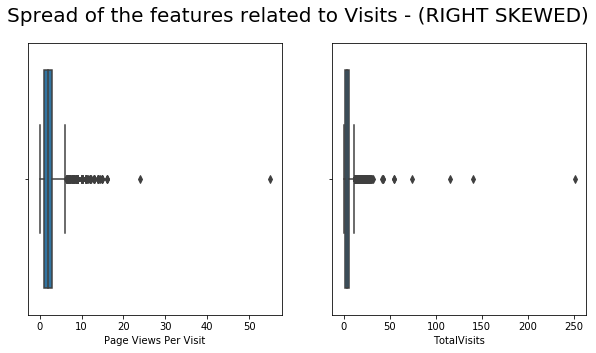

In [28]:
plt.figure(figsize = (10,5))
c = 1
for x in small_miss.select_dtypes([int,float]).columns:
    plt.subplot(1,2,c)
    sns.boxplot(small_miss[x].dropna())
    c +=1
    
plt.suptitle('Spread of the features related to Visits - (RIGHT SKEWED)' , size = 20 )
plt.subplots_adjust(hspace= 0.5)


## `The distribution in both the cases is positively skewed yet there are plenty of outliers . If we remove outliers (using iqr) we will loose plenty of rows (about 900 i.e 10% of the data) risking in loosing some potential leads we can target. If we use these columns in our model without transformation the model wouldnot be stable. Hence, the best transformation in this scenerio is logarithmic transformation (converting the variables into log-scale) wherby we can make the distribition look stable and remove outlier influence.`

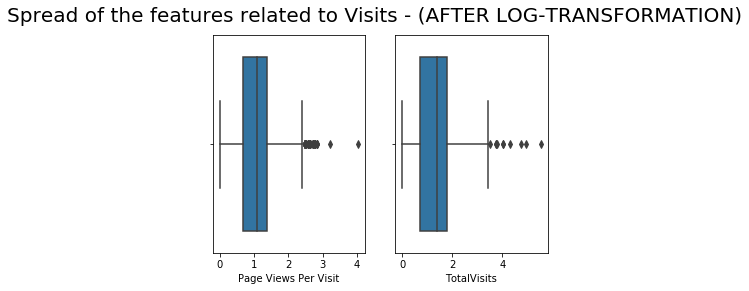

In [29]:
c = 1
for col in small_miss.select_dtypes([int,float]).columns:
    
    # doing log transformation 
    
    x_edu[col] = np.log(x_edu[col] + 1) # a constant 1 added to each datapoint so that we can avoid 0 
                                        # getting converted to -inf after log transformation
    
    
    plt.subplot(1,2,c)
    sns.boxplot(x_edu[col])
    c +=1
    
plt.suptitle('Spread of the features related to Visits - (AFTER LOG-TRANSFORMATION)' , size = 20 )
plt.subplots_adjust(hspace= 0.5)


### Even after log transformation we still have few outliers. Lets remove those datapoints

In [30]:
x_edu = x_edu[(x_edu['Page Views Per Visit'] <= 2.5)]
x_edu = x_edu[(x_edu['TotalVisits'] <= 3.6)]

### Let's see the frequency of categorical variables which had minimum missing values

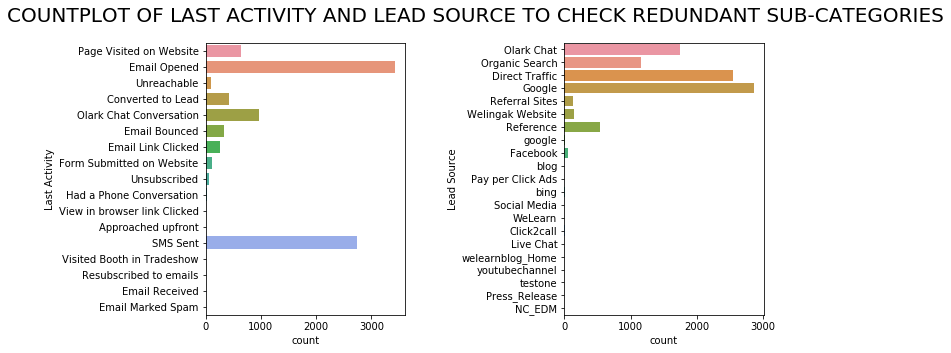

In [31]:
c = 1
plt.figure(figsize= (10,5))
for x in small_miss.select_dtypes([object]).columns:
    plt.subplot(1,2,c)
    sns.countplot(y = small_miss[x])
    c +=1
plt.subplots_adjust(wspace = 0.8)
plt.suptitle('COUNTPLOT OF LAST ACTIVITY AND LEAD SOURCE TO CHECK REDUNDANT SUB-CATEGORIES' , size = 20 )
plt.subplots_adjust(hspace= 0.5)


### We can see in the countplot of Lead Source we have 'google' and 'Google' .Lets replace it

In [32]:
x_edu['Lead Source'] = x_edu['Lead Source'].replace('google','Google')

## `Lets do a segmented univariate analysis for these columns , if we can see any patterns we can transform the variable and use it for model B`

Text(0.5, 0.98, '% DISTRIBUTION OF CATEGORIES ACROSS CONVERTED ( TARGET VARIABLE)')

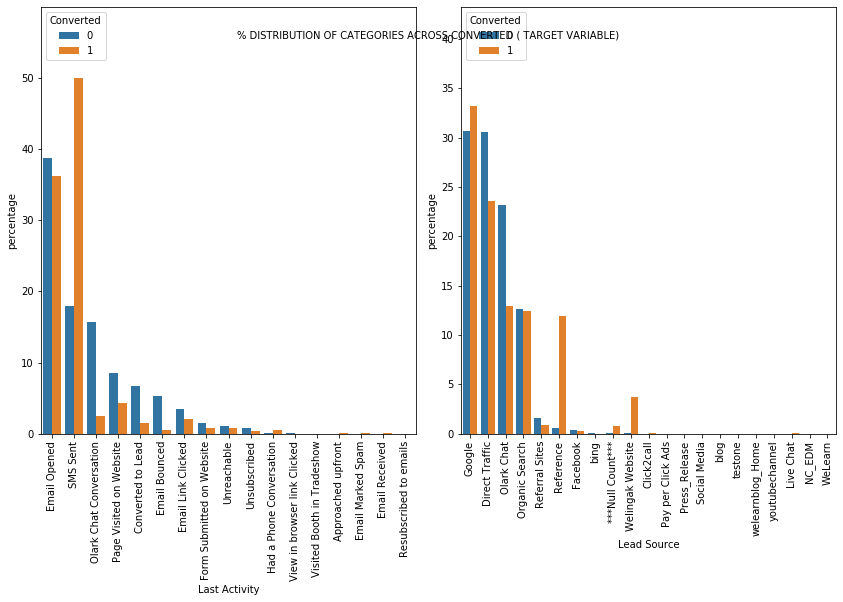

In [33]:
c = 1

plt.figure(figsize = (12,24))
for x in small_miss.select_dtypes([object]).columns: #consisting categorical columns
        plt.subplot(3,2,c)
        
        # grouping data based on Target column i.e Converted , counting values, converting into % and then plotting it
        
        ccu = x_edu.replace(np.nan,'***Null Count***').groupby(['Converted'])[x].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
        sns.barplot(y = 'percentage' ,x = x,data = ccu,hue = 'Converted')
        plt.ylim(0,ccu['percentage'].max() + 10)
        plt.tight_layout()
        plt.xticks(rotation = 90) #rotating for easy visibility
        c += 1
        
plt.subplots_adjust(hspace= 0.5)
plt.suptitle('% DISTRIBUTION OF CATEGORIES ACROSS CONVERTED ( TARGET VARIABLE)' , size = 10)

### ** Temp 2 can be used while building model B **

In [34]:
temp2 = x_edu['Last Activity'].map({'SMS Sent':'SMS Sent'}).replace(np.nan,'Other')

### Lets's remove all the rows of those columns which had about 1% missing values which have seen earlier

In [35]:
for col in small_miss.columns:
    x_edu = x_edu[~ x_edu[col].isna()]
    

## `Let's finally check the missing % in each column to verify we have no null values in the dataframe` 

In [36]:
missing = round(x_edu.isnull().mean() * 100,2).sort_values(ascending = False)
missing.head()

A free copy of Mastering The Interview    0.0
X Education Forums                        0.0
TotalVisits                               0.0
Last Activity                             0.0
Lead Source                               0.0
dtype: float64

## `Lets check the number of unique values in each column so that we can proceed our EDA according to it`

In [37]:
x_edu.nunique()

Page Views Per Visit                          99
TotalVisits                                   32
Last Activity                                 17
Lead Source                                   20
Lead Number                                 9035
Do Not Call                                    2
Do Not Email                                   2
Get updates on DM Content                      1
Digital Advertisement                          2
I agree to pay the amount through cheque       1
Converted                                      2
Last Notable Activity                         16
What_matters_BETTER_CAREER                     2
Magazine                                       1
Lead Origin                                    4
Status_reply after email                       2
Newspaper                                      2
Newspaper Article                              2
Prospect ID                                 9035
Receive More Updates About Our Courses         1
Search              

## We can see that few columns have only 1 unique columns. Lets see what are those

In [38]:
one_unique = x_edu.loc[:,x_edu.nunique().values == 1]
one_unique.head()

,Get updates on DM Content,I agree to pay the amount through cheque,Magazine,Receive More Updates About Our Courses,Update me on Supply Chain Content
0,No,No,No,No,No
1,No,No,No,No,No
2,No,No,No,No,No
3,No,No,No,No,No
4,No,No,No,No,No


### All these columns have only 'No' it and hence they are redundant . Let's remove those columns

In [39]:
x_edu = x_edu[x_edu.columns.difference(one_unique.columns)]
x_edu.nunique()

A free copy of Mastering The Interview       2
Converted                                    2
Digital Advertisement                        2
Do Not Call                                  2
Do Not Email                                 2
Last Activity                               17
Last Notable Activity                       16
Lead Number                               9035
Lead Origin                                  4
Lead Source                                 20
Newspaper                                    2
Newspaper Article                            2
Page Views Per Visit                        99
Prospect ID                               9035
Search                                       2
Status_reply after email                     2
Through Recommendations                      2
Total Time Spent on Website               1713
TotalVisits                                 32
What_matters_BETTER_CAREER                   2
X Education Forums                           2
dtype: int64

### Let's see all the columns with2 unique values

In [40]:
two_unique = x_edu.loc[:,x_edu.nunique().values == 2]
two_unique.head()

,A free copy of Mastering The Interview,Converted,Digital Advertisement,Do Not Call,Do Not Email,Newspaper,Newspaper Article,Search,Status_reply after email,Through Recommendations,What_matters_BETTER_CAREER,X Education Forums
0,No,0,No,No,No,No,No,No,Other,No,Better Career Prospects,No
1,No,0,No,No,No,No,No,No,Other,No,Better Career Prospects,No
2,Yes,1,No,No,No,No,No,No,Will revert after reading the email,No,Better Career Prospects,No
3,No,0,No,No,No,No,No,No,Other,No,Better Career Prospects,No
4,No,1,No,No,No,No,No,No,Will revert after reading the email,No,Better Career Prospects,No


### Let's use label encoder to convert all these variables to dummy variables

In [41]:
from sklearn.preprocessing import LabelEncoder 
for x in two_unique.columns: #looping on columns
    le = LabelEncoder()
    two_unique[x] = le.fit_transform(two_unique[x]) #fitting and tranforming the column into dummies

In [42]:
two_unique

,A free copy of Mastering The Interview,Converted,Digital Advertisement,Do Not Call,Do Not Email,Newspaper,Newspaper Article,Search,Status_reply after email,Through Recommendations,What_matters_BETTER_CAREER,X Education Forums
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0,1,0,0,1,0,0,0,1,0,0,0
9236,1,0,0,0,0,0,0,0,0,0,0,0
9237,1,0,0,0,1,0,0,0,0,0,0,0
9238,0,1,0,0,0,0,0,0,0,0,1,0


In [43]:
x_edu[two_unique.columns] = two_unique
x_edu['What_matters_BETTER_CAREER'] = two_unique['What_matters_BETTER_CAREER'].map({0:1,1:0})

### Let's check if there is any imbalance between '1s' and '0s' of these columns

In [44]:
yes_no_count = pd.DataFrame()
for col in two_unique.columns.difference(['Converted']): #converted is the target column(we dont need to check for it)
    yes_no_count = pd.concat([yes_no_count,two_unique[col].value_counts().to_frame().T])
    

yes_no_count['%_imbalance'] = two_unique.mean() * 100

yes_no_count

,0,1,%_imbalance
A free copy of Mastering The Interview,6168,2867,31.732153
Digital Advertisement,9031,4,0.044272
Do Not Call,9033,2,0.022136
Do Not Email,8330,705,7.802988
Newspaper,9034,1,0.011068
Newspaper Article,9033,2,0.022136
Search,9021,14,0.154953
Status_reply after email,7022,2013,22.280022
Through Recommendations,9028,7,0.077476
What_matters_BETTER_CAREER,6347,2688,29.750968


### Except 4 variables other variables doesnot seem important for modelling as they donot explain much. Lets remove them

In [45]:
x_edu = x_edu[x_edu.columns.difference(yes_no_count[yes_no_count['%_imbalance'] < 5].index)]
x_edu.head()

,A free copy of Mastering The Interview,Converted,Do Not Email,Last Activity,Last Notable Activity,Lead Number,Lead Origin,Lead Source,Page Views Per Visit,Prospect ID,Status_reply after email,Total Time Spent on Website,TotalVisits,What_matters_BETTER_CAREER
0,0,0,0,Page Visited on Website,Modified,660737,API,Olark Chat,0.000000,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.000000,1
1,0,0,0,Email Opened,Email Opened,660728,API,Organic Search,1.252763,2a272436-5132-4136-86fa-dcc88c88f482,0,674,1.791759,1
2,1,1,0,Email Opened,Email Opened,660727,Landing Page Submission,Direct Traffic,1.098612,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,1532,1.098612,1
3,0,0,0,Unreachable,Modified,660719,Landing Page Submission,Direct Traffic,0.693147,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,305,0.693147,1
4,0,1,0,Converted to Lead,Modified,660681,Landing Page Submission,Google,0.693147,3256f628-e534-4826-9d63-4a8b88782852,1,1428,1.098612,1


In [46]:
x_edu.nunique() 

A free copy of Mastering The Interview       2
Converted                                    2
Do Not Email                                 2
Last Activity                               17
Last Notable Activity                       16
Lead Number                               9035
Lead Origin                                  4
Lead Source                                 20
Page Views Per Visit                        99
Prospect ID                               9035
Status_reply after email                     2
Total Time Spent on Website               1713
TotalVisits                                 32
What_matters_BETTER_CAREER                   2
dtype: int64

## Lets check the other columns

In [47]:
to_check = (x_edu.nunique() > 2).values & (x_edu.nunique() < 21).values
to_check  #boolean containing which columns to check

array([False, False, False,  True,  True, False,  True,  True, False,
       False, False, False, False, False])

In [48]:
more_cat = x_edu.loc[:,to_check]
more_cat.head()


,Last Activity,Last Notable Activity,Lead Origin,Lead Source
0,Page Visited on Website,Modified,API,Olark Chat
1,Email Opened,Email Opened,API,Organic Search
2,Email Opened,Email Opened,Landing Page Submission,Direct Traffic
3,Unreachable,Modified,Landing Page Submission,Direct Traffic
4,Converted to Lead,Modified,Landing Page Submission,Google


### ** Doing Segmented Univariate Analysis for the categorical columns so that we can include that in Model 2 **

Text(0.5, 0.98, '% DISTRIBUTION OF CATEGORIES ACROSS CONVERTED ( TARGET VARIABLE)')

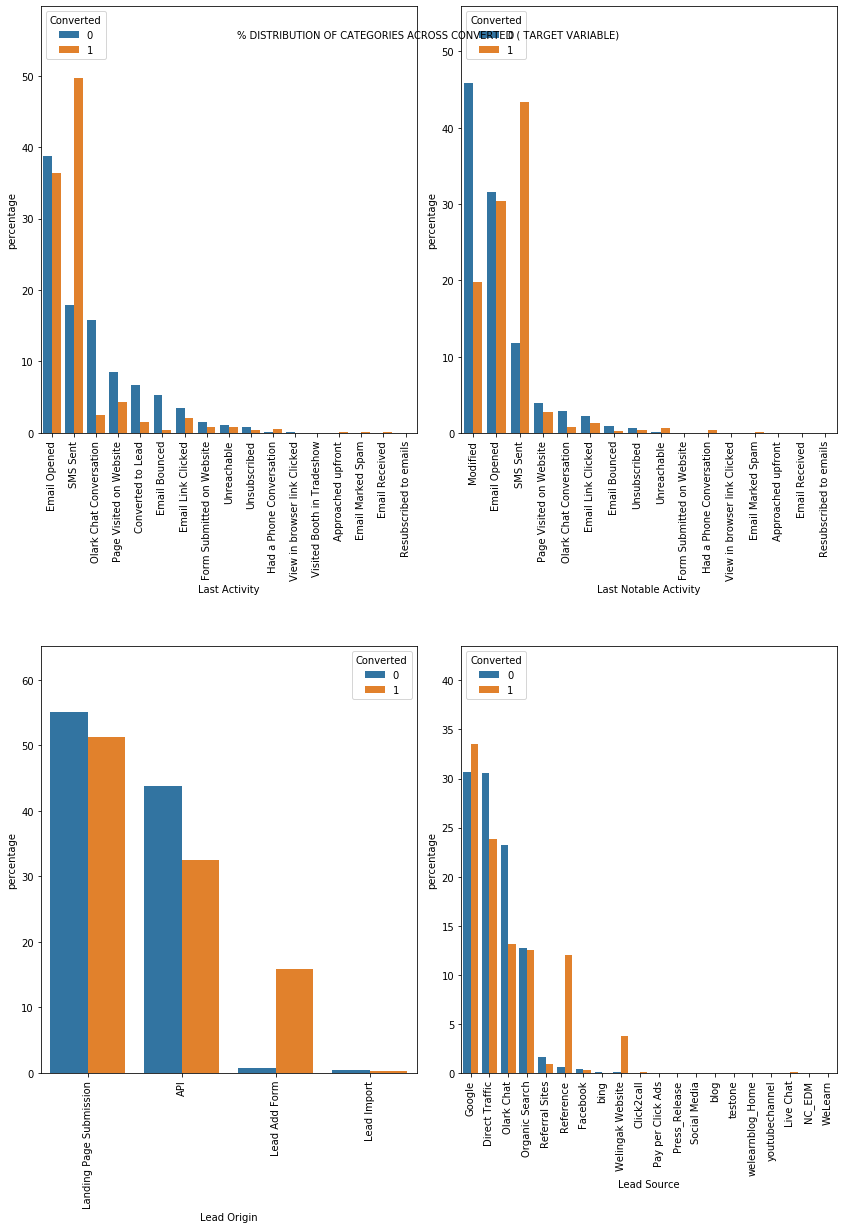

In [49]:
c = 1

plt.figure(figsize = (12,24))
for x in more_cat.columns: #consisting categorical columns
        plt.subplot(3,2,c)
        
        # grouping data based on Target column i.e Converted , counting values, converting into % and then plotting it
        
        ccu = x_edu.replace(np.nan,'***Null Count***').groupby(['Converted'])[x].value_counts(normalize = True).rename('percentage').mul(100).reset_index()
        sns.barplot(y = 'percentage' ,x = x,data = ccu,hue = 'Converted')
        plt.ylim(0,ccu['percentage'].max() + 10)
        plt.tight_layout()
        plt.xticks(rotation = 90) #rotating for easy visibility
        c += 1
        
plt.subplots_adjust(hspace= 0.5)
plt.suptitle('% DISTRIBUTION OF CATEGORIES ACROSS CONVERTED ( TARGET VARIABLE)' , size = 10)

### ** Using temp3 for model 2 **

In [50]:
temp3 = more_cat['Last Notable Activity']
temp3[temp3.isin(['SMS Sent','Had a Phone Conversation','Unreachable'])] = 'sms_phone_contact'

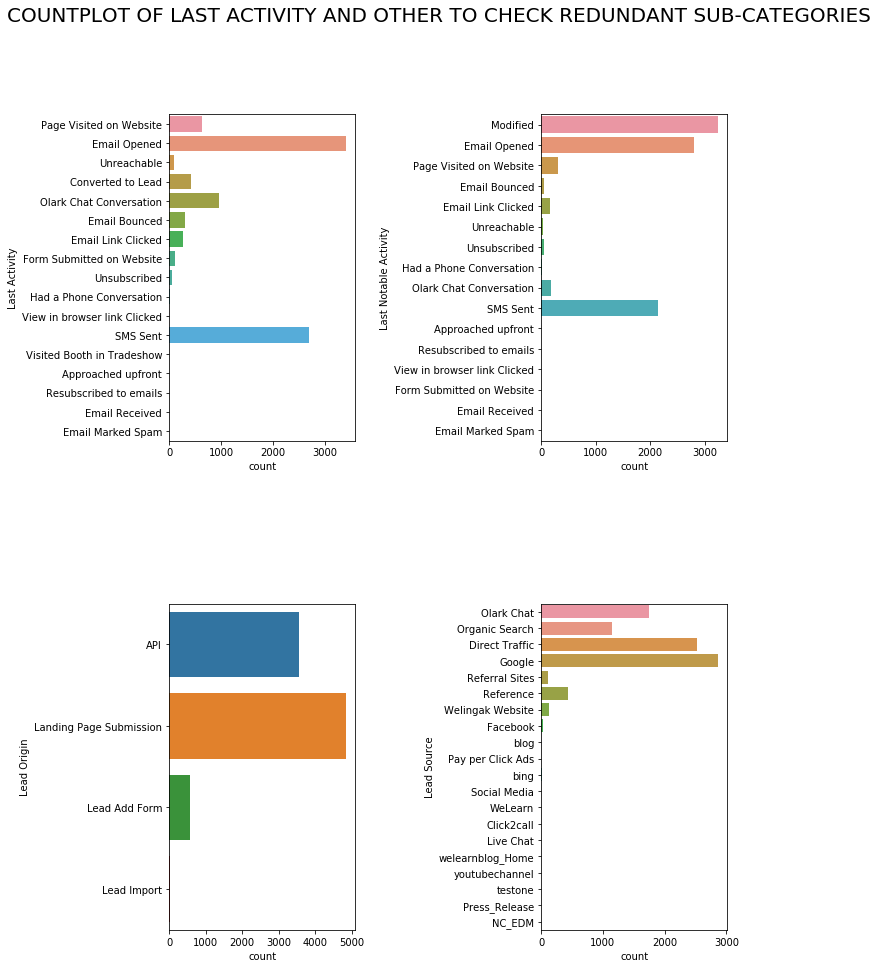

In [51]:
c = 1
plt.figure(figsize= (10,15))
for x in more_cat.columns:
    plt.subplot(2,2,c)
    sns.countplot(y = x_edu[x])
    c +=1
plt.subplots_adjust(wspace = 1)
plt.suptitle('COUNTPLOT OF LAST ACTIVITY AND OTHER TO CHECK REDUNDANT SUB-CATEGORIES' , size = 20 )
plt.subplots_adjust(hspace= 0.5)

### These columns have many sub-categories. Let's see if we can make sub-categories which have low frequency into one group

In [52]:
more_cat['Last Activity'].value_counts()

Email Opened                    3419
SMS Sent                        2708
Olark Chat Conversation          970
Page Visited on Website          629
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               266
Form Submitted on Website        115
Unreachable                       88
Unsubscribed                      58
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [53]:
more_cat['Last Activity'].value_counts()[-7:].index

Index(['Had a Phone Conversation', 'View in browser link Clicked',
       'Approached upfront', 'Email Received', 'Email Marked Spam',
       'Visited Booth in Tradeshow', 'Resubscribed to emails'],
      dtype='object')

### ` Making all the sub-categories of 'last activity' in the above list into one group i.e 'Other' `

In [54]:
more_cat['Last Activity'][more_cat['Last Activity'].isin(more_cat['Last Activity'].value_counts()[-7:].index)] = 'Other'



In [55]:
more_cat['Last Notable Activity'].value_counts()

Modified                        3252
Email Opened                    2812
sms_phone_contact               2192
Page Visited on Website          313
Olark Chat Conversation          183
Email Link Clicked               172
Email Bounced                     60
Unsubscribed                      44
Email Marked Spam                  2
View in browser link Clicked       1
Email Received                     1
Form Submitted on Website          1
Approached upfront                 1
Resubscribed to emails             1
Name: Last Notable Activity, dtype: int64

### `SAME WAY LETS DO FOR OTHER CATEGORICAL VARIABLES TOO`

In [56]:

more_cat['Last Notable Activity'][more_cat['Last Notable Activity'].isin(more_cat['Last Notable Activity'].value_counts()[-7:].index)] = 'Other'

In [57]:
more_cat['Lead Source'].value_counts()

Google               2868
Direct Traffic       2530
Olark Chat           1753
Organic Search       1140
Reference             443
Welingak Website      129
Referral Sites        119
Facebook               31
bing                    6
Click2call              4
Social Media            2
Live Chat               2
testone                 1
NC_EDM                  1
WeLearn                 1
youtubechannel          1
blog                    1
Press_Release           1
welearnblog_Home        1
Pay per Click Ads       1
Name: Lead Source, dtype: int64

In [58]:
more_cat['Lead Source'][more_cat['Lead Source'].isin(more_cat['Lead Source'].value_counts()[-12:].index)] = 'Other'

In [59]:
x_edu[more_cat.columns] = more_cat

### We have done Data cleaning and checked the distributions and frequency of almost all variables . We finally need to check if there are any outliers in 'Total Time Spent on Website'

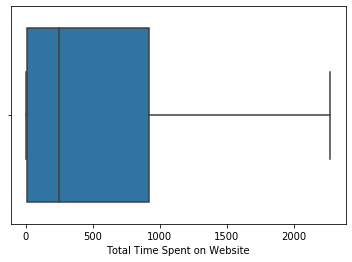

In [60]:
sns.boxplot(x_edu['Total Time Spent on Website'])

### The distribution looks clean and there are no outliers. Lets check how much data we lost after DATA CLEANING AND PREPARATION

In [61]:
print('Initial shape of the data BEFORE EDA and cleaning was ' + str(shape_init))
print('The shape of the data AFTER EDA and cleaning is ' + str(x_edu.shape))

Initial shape of the data BEFORE EDA and cleaning was (9240, 37)
The shape of the data AFTER EDA and cleaning is (9035, 14)


### We lost less than 1% of the rows(leads) and we also reduced features. Let's see the co-relation between the numerical and dummy variables

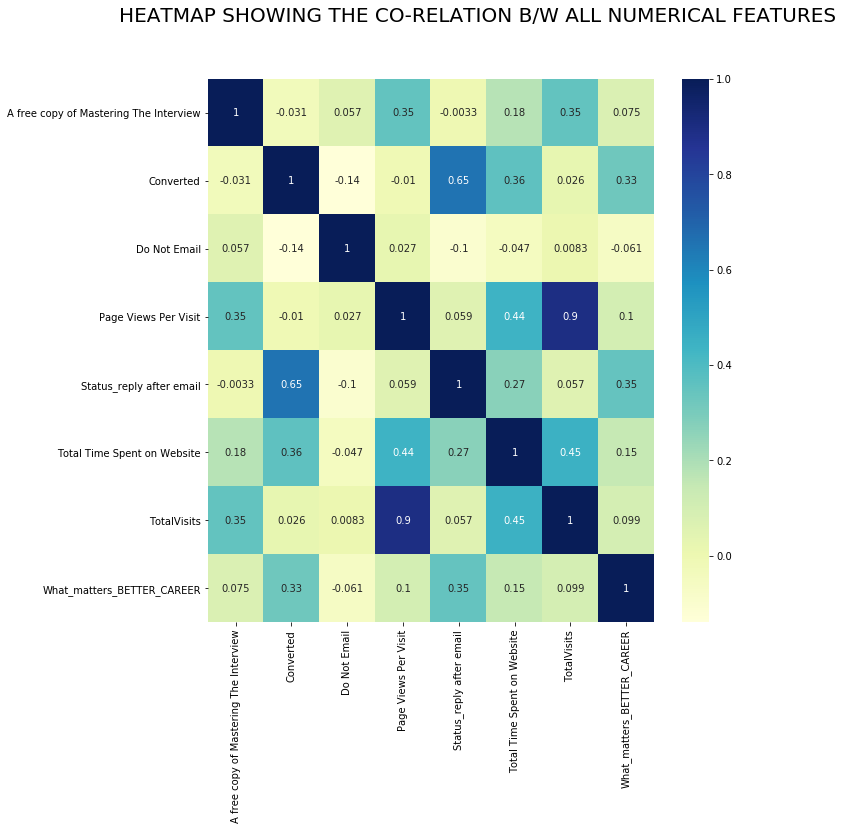

In [62]:
plt.figure(figsize = (10,10))
sns.heatmap(x_edu[x_edu.columns.difference(['Lead Number'])].corr() , annot = True,cmap="YlGnBu")
plt.suptitle('HEATMAP SHOWING THE CO-RELATION B/W ALL NUMERICAL FEATURES' , size = 20 )
plt.subplots_adjust(hspace= 0.5)


## Let's check the imbalance % across target variable

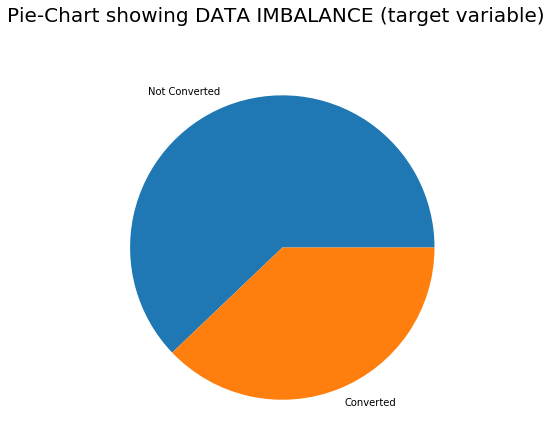

In [63]:
plt.figure(figsize = (7,7))
plt.pie(x_edu['Converted'].value_counts() , labels = ['Not Converted','Converted'])
plt.suptitle('Pie-Chart showing DATA IMBALANCE (target variable)' , size = 20 )
plt.subplots_adjust(hspace= 0.5)

                                                      
                                                                                                                                                                                                                                                                                                                                                  

## Imbalance Percentage

In [64]:
x_edu['Converted'].mean() * 100

37.87493082457111

# `Data Preparation for Modelling ( MODEL A)`

In [65]:
for_mod = copy.deepcopy(x_edu) #making a deepcopy of x_edu so that we can work on 'for_mod'
del for_mod['Prospect ID'] #removing prospect id as it is no way concerned with modelling

## Lets get dummies for all categorical columns and then remove the dummy column created for a sub-category where '1' is minimal comparing to all other sub-categories under a particular category(column)  

## (n-1) dummy variables can be used to represent n sub-categories

In [66]:
dum = pd.get_dummies(for_mod.select_dtypes([object])) #creating dummies

for x in for_mod.select_dtypes([object]).columns: #selecting original columns
    del dum[dum.filter(like = x).sum().sort_values().index[0]] #removing sub-categories under each category where sum is minimal
    del for_mod[x] #deleting the orginal column

dum

,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,...,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
9236,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
9237,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0
9238,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


## Replacing and adding orginal columns with with their respective dummy representation

In [67]:
for_mod[dum.columns] = dum
for_mod.head()

,A free copy of Mastering The Interview,Converted,Do Not Email,Lead Number,Page Views Per Visit,Status_reply after email,Total Time Spent on Website,TotalVisits,What_matters_BETTER_CAREER,Last Activity_Converted to Lead,...,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website
0,0,0,0,660737,0.000000,0,0,0.000000,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,660728,1.252763,0,674,1.791759,1,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,0,660727,1.098612,1,1532,1.098612,1,0,...,1,0,1,0,0,0,0,0,0,0
3,0,0,0,660719,0.693147,0,305,0.693147,1,0,...,1,0,1,0,0,0,0,0,0,0
4,0,1,0,660681,0.693147,1,1428,1.098612,1,1,...,1,0,0,0,1,0,0,0,0,0


### splitting dependent and independent variables

In [68]:
y = for_mod.pop('Converted')
X = for_mod

## Performing train-test split

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
lead_num_train = X_train.pop('Lead Number')  #number assigned to each lead
lead_num_test = X_test.pop('Lead Number')


### Perform scaling using Normalization (0-1)

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

### Fitting and Transforming all columns with Min-Max scaler

In [72]:
X_train[X_train.columns] = scaler.fit_transform(X_train)
X_train

,A free copy of Mastering The Interview,Do Not Email,Page Views Per Visit,Status_reply after email,Total Time Spent on Website,TotalVisits,What_matters_BETTER_CAREER,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,...,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website
1246,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4991,1.0,0.0,0.721057,0.0,0.442782,0.512443,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7460,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6360,1.0,0.0,0.317299,0.0,0.117518,0.556530,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5517,1.0,0.0,0.442114,0.0,0.062940,0.314203,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
83,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8234,1.0,0.0,0.442114,0.0,0.037852,0.314203,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7107,0.0,0.0,0.442114,0.0,0.012764,0.314203,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## `As there are many features after Dummy Creation lets use Automatic feature selection technique(rfe) to select top 13 features and then work on them to arrive at a optimum model`

In [73]:
from sklearn.linear_model import LogisticRegression  #importing Class LogisticRegression
logreg = LogisticRegression()

In [74]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

### The following are the features picked using RFE

In [75]:
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Page Views Per Visit', 'Status_reply after email',
       'Total Time Spent on Website', 'TotalVisits',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'Last Notable Activity_Email Bounced',
       'Last Notable Activity_sms_phone_contact',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website'],
      dtype='object')

### The following columns were eliminated by RFE

In [76]:
X_train.columns[~rfe.support_]

Index(['A free copy of Mastering The Interview', 'What_matters_BETTER_CAREER',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Page Visited on Website', 'Lead Origin_API',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites'],
      dtype='object')

## `Lets start our process of manual feature elimination from this point keeping stastical and business perspective in mind`

### Lets work with the library 'statsmodels' and use GLM(generalized linear model) to see the summary metrics of the model

In [77]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()) #learning the co-efficients
model_1 = logm1.fit() #fitting the model
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6324
Model:                            GLM   Df Residuals:                     6310
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1901.3
Date:                Mon, 20 Apr 2020   Deviance:                       3802.5
Time:                        18:56:10   Pearson chi2:                 7.80e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                      -1.8259      0.101    -18.083      0.000      -2.024      -1.628
Do Not Email                               -1.2967      0.251     -5.160      0.000      -1.789      -0.804
Page Views Per Visit                       -3.1859      0.364     -8.753      0.000      -3.899      -2.472
Status_reply after email                    4.6097      0.168     27.482      0.000       4.281       4.938
Total Time Spent on Website                 4.2490      0.192     22.182      0.000       3.874       4.624
TotalVisits                                 2.1981      0.379      5.800      0.000       1.455       2.941
Last Activity_Converted to Lead            -1.2661      0.268     -4.733      0.000      -1.790      -0.742
Last Activity_Email Bounced                -1.5489      0.672     -2.305      0.021      -2.866      -0.232
Last Activity_Olark Chat Conversation      -1.2918      0.188     -6.888      0.000      -1.659      -0.924
Last Notable Activity_Email Bounced         2.4074      0.828      2.909      0.004       0.785       4.029
Last Notable Activity_sms_phone_contact     1.4542      0.098     14.809      0.000       1.262       1.647
Lead Origin_Landing Page Submission        -0.4814      0.105     -4.591      0.000      -0.687      -0.276
Lead Origin_Lead Add Form                   3.0840      0.249     12.404      0.000       2.597       3.571
Lead Source_Welingak Website                2.0642      0.758      2.722      0.006       0.578       3.551
===========================================================================================================
"""

### Lets check the variance inflation factor for all features so that we can remove features which are already explained by other features (high-co relation)

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
vif = pd.DataFrame() #creating a dataframe
vif['Features'] = X_train[col].columns #creating a column with all the feature names
# looping on all the features and getting its respective features
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Page Views Per Visit,18.68
4,TotalVisits,16.59
10,Lead Origin_Landing Page Submission,3.68
3,Total Time Spent on Website,2.49
6,Last Activity_Email Bounced,1.91
0,Do Not Email,1.76
2,Status_reply after email,1.62
9,Last Notable Activity_sms_phone_contact,1.49
11,Lead Origin_Lead Add Form,1.45
12,Lead Source_Welingak Website,1.31


### The p-values are fine but 'Page Views Per Visit' has a high Vif. Let's remove it and build the model again

### `Model 2`

In [80]:
X_train_sm = X_train_sm[X_train_sm.columns.difference(['Page Views Per Visit'])]
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model_2 = logm2.fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6324
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1940.7
Date:                Mon, 20 Apr 2020   Deviance:                       3881.4
Time:                        18:56:10   Pearson chi2:                 7.34e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Do Not Email                               -1.3122      0.249     -5.261      0.000      -1.801      -0.823
Last Activity_Converted to Lead            -1.3305      0.266     -4.995      0.000      -1.853      -0.808
Last Activity_Email Bounced                -1.5141      0.685     -2.211      0.027      -2.856      -0.172
Last Activity_Olark Chat Conversation      -1.2263      0.187     -6.558      0.000      -1.593      -0.860
Last Notable Activity_Email Bounced         2.4098      0.832      2.897      0.004       0.779       4.040
Last Notable Activity_sms_phone_contact     1.3438      0.096     14.038      0.000       1.156       1.531
Lead Origin_Landing Page Submission        -0.7541      0.098     -7.698      0.000      -0.946      -0.562
Lead Origin_Lead Add Form                   3.2469      0.248     13.073      0.000       2.760       3.734
Lead Source_Welingak Website                2.0817      0.758      2.747      0.006       0.596       3.567
Status_reply after email                    4.5098      0.165     27.293      0.000       4.186       4.834
Total Time Spent on Website                 4.0711      0.187     21.784      0.000       3.705       4.437
TotalVisits                                -0.4430      0.248     -1.784      0.074      -0.930       0.044
const                                      -1.9925      0.102    -19.610      0.000      -2.192      -1.793
===========================================================================================================
"""

### We can see that Negative log likelihood has decreased indicating a better fit than the previous model. But lets see the VIF of 'TotalVisits' as it already has a high p-value

In [81]:
col = col.difference(['Page Views Per Visit'])
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,TotalVisits,4.32
6,Lead Origin_Landing Page Submission,3.30
10,Total Time Spent on Website,2.48
2,Last Activity_Email Bounced,1.91
0,Do Not Email,1.76
9,Status_reply after email,1.62
5,Last Notable Activity_sms_phone_contact,1.47
7,Lead Origin_Lead Add Form,1.45
8,Lead Source_Welingak Website,1.31
4,Last Notable Activity_Email Bounced,1.24


### Total visits has high vif and high p-value. Let's drop it build the model again

### `Model 3`

In [82]:
X_train_sm = X_train_sm[X_train_sm.columns.difference(['TotalVisits'])]
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model_3 = logm3.fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6324
Model:                            GLM   Df Residuals:                     6312
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1942.3
Date:                Mon, 20 Apr 2020   Deviance:                       3884.6
Time:                        18:56:10   Pearson chi2:                 7.32e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Do Not Email                               -1.3169      0.249     -5.289      0.000      -1.805      -0.829
Last Activity_Converted to Lead            -1.2791      0.265     -4.831      0.000      -1.798      -0.760
Last Activity_Email Bounced                -1.4545      0.687     -2.117      0.034      -2.801      -0.108
Last Activity_Olark Chat Conversation      -1.1891      0.186     -6.379      0.000      -1.555      -0.824
Last Notable Activity_Email Bounced         2.3792      0.833      2.855      0.004       0.746       4.012
Last Notable Activity_sms_phone_contact     1.3494      0.096     14.115      0.000       1.162       1.537
Lead Origin_Landing Page Submission        -0.8184      0.091     -9.015      0.000      -0.996      -0.640
Lead Origin_Lead Add Form                   3.3426      0.243     13.743      0.000       2.866       3.819
Lead Source_Welingak Website                2.0878      0.758      2.755      0.006       0.602       3.573
Status_reply after email                    4.5053      0.165     27.302      0.000       4.182       4.829
Total Time Spent on Website                 3.9597      0.175     22.588      0.000       3.616       4.303
const                                      -2.1004      0.083    -25.257      0.000      -2.263      -1.937
===========================================================================================================
"""

In [83]:
col = col.difference(['TotalVisits'])
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,Total Time Spent on Website,1.99
2,Last Activity_Email Bounced,1.90
6,Lead Origin_Landing Page Submission,1.89
0,Do Not Email,1.75
9,Status_reply after email,1.62
5,Last Notable Activity_sms_phone_contact,1.46
7,Lead Origin_Lead Add Form,1.45
8,Lead Source_Welingak Website,1.31
4,Last Notable Activity_Email Bounced,1.24
1,Last Activity_Converted to Lead,1.04


### Now we have low VIF's and model with significant p-values . But our business goal and the question we need to answer is 'What variables indicate that the lead is a potential lead and to how much extent' . In other words in building MODEL A we are concerned only with what factors can improve lead conversion rather than thinking about what factors can negatively impact lead conversion. In that case we need to have only variables with positive influence(positive co-efficients) in our model.

# `So, lets remove the negatively impacted features from the model one by one`

### `Model 4`

In [84]:
col = col.difference(['Last Activity_Email Bounced'])
X_train_sm = X_train_sm[X_train_sm.columns.difference(['Last Activity_Email Bounced'])]
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model_4 = logm4.fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6324
Model:                            GLM   Df Residuals:                     6313
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1945.3
Date:                Mon, 20 Apr 2020   Deviance:                       3890.6
Time:                        18:56:10   Pearson chi2:                 7.38e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Do Not Email                               -1.5561      0.232     -6.721      0.000      -2.010      -1.102
Last Activity_Converted to Lead            -1.2702      0.265     -4.796      0.000      -1.789      -0.751
Last Activity_Olark Chat Conversation      -1.1787      0.187     -6.319      0.000      -1.544      -0.813
Last Notable Activity_Email Bounced         1.1734      0.555      2.115      0.034       0.086       2.261
Last Notable Activity_sms_phone_contact     1.3721      0.095     14.396      0.000       1.185       1.559
Lead Origin_Landing Page Submission        -0.8242      0.091     -9.075      0.000      -1.002      -0.646
Lead Origin_Lead Add Form                   3.3573      0.243     13.805      0.000       2.881       3.834
Lead Source_Welingak Website                2.1162      0.759      2.788      0.005       0.628       3.604
Status_reply after email                    4.5078      0.165     27.394      0.000       4.185       4.830
Total Time Spent on Website                 3.9689      0.175     22.643      0.000       3.625       4.312
const                                      -2.1096      0.083    -25.381      0.000      -2.273      -1.947
===========================================================================================================
"""

### `Model 5`

In [85]:
col = col.difference(['Do Not Email'])
X_train_sm = X_train_sm[X_train_sm.columns.difference(['Do Not Email'])]
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model_5 = logm5.fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6324
Model:                            GLM   Df Residuals:                     6314
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1975.4
Date:                Mon, 20 Apr 2020   Deviance:                       3950.7
Time:                        18:56:10   Pearson chi2:                 7.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Last Activity_Converted to Lead            -1.1971      0.266     -4.503      0.000      -1.718      -0.676
Last Activity_Olark Chat Conversation      -1.1551      0.187     -6.189      0.000      -1.521      -0.789
Last Notable Activity_Email Bounced        -0.3016      0.508     -0.594      0.553      -1.297       0.694
Last Notable Activity_sms_phone_contact     1.3547      0.094     14.345      0.000       1.170       1.540
Lead Origin_Landing Page Submission        -0.8711      0.090     -9.655      0.000      -1.048      -0.694
Lead Origin_Lead Add Form                   3.3934      0.244     13.923      0.000       2.916       3.871
Lead Source_Welingak Website                1.9874      0.757      2.626      0.009       0.504       3.471
Status_reply after email                    4.5509      0.164     27.687      0.000       4.229       4.873
Total Time Spent on Website                 4.0189      0.174     23.101      0.000       3.678       4.360
const                                      -2.1801      0.083    -26.355      0.000      -2.342      -2.018
===========================================================================================================
"""

### `Removing the feature beacuse its not significant`

### `Model 6`

In [86]:
col = col.difference(['Last Notable Activity_Email Bounced'])
X_train_sm = X_train_sm[X_train_sm.columns.difference(['Last Notable Activity_Email Bounced'])]
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model_6 = logm6.fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6324
Model:                            GLM   Df Residuals:                     6315
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1975.5
Date:                Mon, 20 Apr 2020   Deviance:                       3951.1
Time:                        18:56:10   Pearson chi2:                 7.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Last Activity_Converted to Lead            -1.1937      0.266     -4.490      0.000      -1.715      -0.673
Last Activity_Olark Chat Conversation      -1.1518      0.187     -6.174      0.000      -1.517      -0.786
Last Notable Activity_sms_phone_contact     1.3582      0.094     14.406      0.000       1.173       1.543
Lead Origin_Landing Page Submission        -0.8712      0.090     -9.657      0.000      -1.048      -0.694
Lead Origin_Lead Add Form                   3.3964      0.244     13.937      0.000       2.919       3.874
Lead Source_Welingak Website                1.9868      0.757      2.625      0.009       0.503       3.470
Status_reply after email                    4.5530      0.164     27.704      0.000       4.231       4.875
Total Time Spent on Website                 4.0179      0.174     23.098      0.000       3.677       4.359
const                                      -2.1834      0.083    -26.445      0.000      -2.345      -2.022
===========================================================================================================
"""

### `Model 7`

In [87]:
col = col.difference(['Last Activity_Converted to Lead'])
X_train_sm = X_train_sm[X_train_sm.columns.difference(['Last Activity_Converted to Lead'])]
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model_7 = logm7.fit()
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6324
Model:                            GLM   Df Residuals:                     6316
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1988.0
Date:                Mon, 20 Apr 2020   Deviance:                       3976.0
Time:                        18:56:10   Pearson chi2:                 7.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Last Activity_Olark Chat Conversation      -1.0867      0.186     -5.838      0.000      -1.452      -0.722
Last Notable Activity_sms_phone_contact     1.4212      0.094     15.170      0.000       1.238       1.605
Lead Origin_Landing Page Submission        -0.8663      0.090     -9.635      0.000      -1.043      -0.690
Lead Origin_Lead Add Form                   3.4560      0.244     14.188      0.000       2.979       3.933
Lead Source_Welingak Website                1.9751      0.757      2.609      0.009       0.492       3.459
Status_reply after email                    4.5455      0.164     27.797      0.000       4.225       4.866
Total Time Spent on Website                 4.0101      0.173     23.137      0.000       3.670       4.350
const                                      -2.2475      0.082    -27.456      0.000      -2.408      -2.087
===========================================================================================================
"""

### `Model 8`

In [88]:
col = col.difference(['Last Activity_Olark Chat Conversation'])
X_train_sm = X_train_sm[X_train_sm.columns.difference(['Last Activity_Olark Chat Conversation'])]
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model_8 = logm8.fit()
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6324
Model:                            GLM   Df Residuals:                     6317
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2008.1
Date:                Mon, 20 Apr 2020   Deviance:                       4016.3
Time:                        18:56:10   Pearson chi2:                 7.58e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Last Notable Activity_sms_phone_contact     1.5254      0.093     16.414      0.000       1.343       1.708
Lead Origin_Landing Page Submission        -0.7283      0.088     -8.296      0.000      -0.900      -0.556
Lead Origin_Lead Add Form                   3.6429      0.242     15.027      0.000       3.168       4.118
Lead Source_Welingak Website                1.9433      0.756      2.570      0.010       0.461       3.425
Status_reply after email                    4.5660      0.163     27.970      0.000       4.246       4.886
Total Time Spent on Website                 4.0884      0.173     23.667      0.000       3.750       4.427
const                                      -2.4603      0.076    -32.231      0.000      -2.610      -2.311
===========================================================================================================
"""

### `Model 9`

In [89]:
col = col.difference(['Lead Origin_Landing Page Submission'])
X_train_sm = X_train_sm[X_train_sm.columns.difference(['Lead Origin_Landing Page Submission'])]
logm9 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model_9 = logm9.fit()
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6324
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2043.5
Date:                Mon, 20 Apr 2020   Deviance:                       4086.9
Time:                        18:56:10   Pearson chi2:                 7.39e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Last Notable Activity_sms_phone_contact     1.4554      0.091     16.023      0.000       1.277       1.633
Lead Origin_Lead Add Form                   3.9643      0.240     16.521      0.000       3.494       4.435
Lead Source_Welingak Website                1.9497      0.756      2.579      0.010       0.468       3.431
Status_reply after email                    4.5043      0.162     27.789      0.000       4.187       4.822
Total Time Spent on Website                 3.7579      0.165     22.739      0.000       3.434       4.082
const                                      -2.7723      0.070    -39.448      0.000      -2.910      -2.635
===========================================================================================================
"""

Last Notable Activity_SMS Sent	1.4553	0.091	15.968	0.000	1.277	1.634
Lead Origin_Lead Add Form	3.9594	0.240	16.503	0.000	3.489	4.430
Lead Source_Welingak Website	1.9498	0.756	2.579	0.010	0.468	3.431
Status_reply after email	4.5167	0.162	27.870	0.000	4.199	4.834
Total Time Spent on Website	3.7531	0.165	22.715	0.000	3.429	4.077
const

###
col = col.difference(['Lead Origin_Landing Page Submission'])
X_train_sm = X_train_sm[X_train_sm.columns.difference(['Lead Origin_Landing Page Submission'])]
logm10 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
model_10 = logm10.fit()
model_10.summary()

## ` We have arrived at a good model with all positive coefficients, low p-values and low vif `

## ` MODEL EVALUATION`

In [90]:
y_train_pred = model_9.predict(X_train_sm).values     #predicting probabilities

### Let's create a dataframe with  'Actual labels' and predicted probabilities

In [91]:
y_train_pred_df = pd.DataFrame({'Actual':y_train, 'Pred_Prob':y_train_pred})
y_train_pred_df['Lead number'] = lead_num_train.values
y_train_pred_df.head()

,Actual,Pred_Prob,Lead number
1246,0,0.058838,646688
4991,0,0.585900,612020
7460,0,0.058838,592393
6360,1,0.294158,601107
5517,0,0.073386,607605


### `Lets plot a receiver operating characteristic curve (ROC) and check the tradeoff between sensitivity and specificity`

In [92]:
from sklearn import metrics

In [93]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [94]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_df['Actual'], y_train_pred_df['Pred_Prob'], drop_intermediate = False )

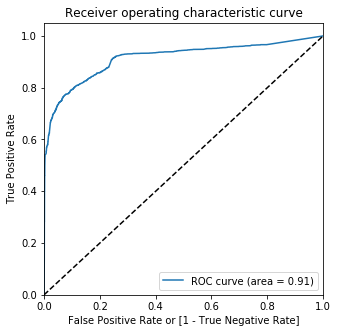

In [95]:
draw_roc( y_train_pred_df['Actual'],y_train_pred_df['Pred_Prob'])

### `The area under the curve (auc) is 91% generalizing a very good accuracy. The roc curve is also steeper `

### `Let's get the predicted labels for different cut-off points ranging from 0 to 0.9`

In [96]:
numbers = [float(x)/10 for x in range(10)] # 0.1 to 0.10
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df['Pred_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Actual,Pred_Prob,Lead number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1246,0,0.058838,646688,1,0,0,0,0,0,0,0,0,0
4991,0,0.585900,612020,1,1,1,1,1,1,0,0,0,0
7460,0,0.058838,592393,1,0,0,0,0,0,0,0,0,0
6360,1,0.294158,601107,1,1,1,0,0,0,0,0,0,0
5517,0,0.073386,607605,1,0,0,0,0,0,0,0,0,0


### Lets see the accuracy, sensitivity and specificity at different probability cut-off points

In [97]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [float(x)/10 for x in range(10)]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_df['Actual'], y_train_pred_df[i] )
    total =sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
cutoff_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.379981,1.000000,0.000000
0.1,0.1,0.737508,0.933833,0.617189
0.2,0.2,0.814358,0.911361,0.754909
0.3,0.3,0.844402,0.821473,0.858454
0.4,0.4,0.865591,0.775697,0.920683
0.5,0.5,0.867963,0.736995,0.948227
0.6,0.6,0.864326,0.704952,0.961999
0.7,0.7,0.860689,0.676654,0.973476
0.8,0.8,0.844877,0.620891,0.982147
0.9,0.9,0.829222,0.564711,0.991329


### `Finding the optimal cut-off point`

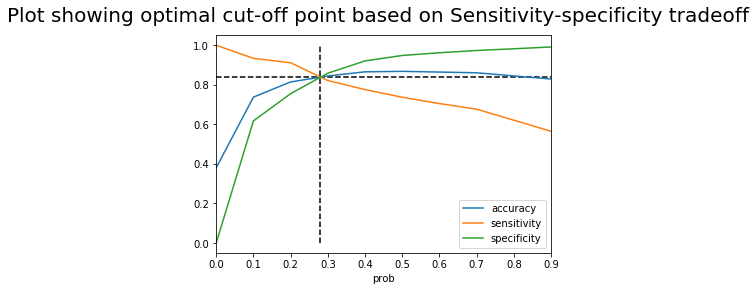

In [98]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.vlines(x=0.28, ymax=1, ymin=0, colors="k", linestyles="--")
plt.hlines(y = 0.84,xmax=1, xmin=0, colors="k", linestyles="--")
plt.suptitle('Plot showing optimal cut-off point based on Sensitivity-specificity tradeoff' , size = 20 )
plt.subplots_adjust(hspace= 0.5)


### ` 0.28 is to be taken at optimal cut-off ` according to SENSITIVITY-SPECIFICITY CURVE(AT THIS POINT OUR SENSITIVITY WOULD BE SLIGHTLY GREATER THAN 80%)

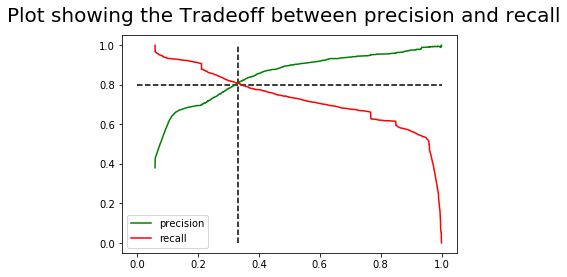

In [99]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_df['Actual'], y_train_pred_df['Pred_Prob'])

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.legend(['precision','recall'])
plt.vlines(x=0.33, ymax=1, ymin=0, colors="k", linestyles="--")
plt.hlines(y = 0.8,xmax=1, xmin=0, colors="k", linestyles="--")
plt.suptitle('Plot showing the Tradeoff between precision and recall' , size = 20 )
plt.subplots_adjust(hspace= 0.5)
plt.show()


### According to precision and recall curve 0.33 can be taken as cut off

## `Lets choose to make a optimum cut-off point as 0.33 according to precision-recall tradeoff as the goal of the case study is to filter 'hot leads' such that 80% of such hot leads are definetly converted. Precision is a measure which tells you the probability of a lead predicted and assigned with a label as 'hot lead' is actually a 'hot lead' . We need this measure to be 80% . This will ensure that lead conversion rate will go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone

In [100]:
y_train_pred_df['final_predicted'] = y_train_pred_df['Pred_Prob'].map( lambda x: 1 if x >= 0.33 else 0)

y_train_pred_df.head()   #dataframe after prdicting the labels

,Actual,Pred_Prob,Lead number,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
1246,0,0.058838,646688,1,0,0,0,0,0,0,0,0,0,0
4991,0,0.585900,612020,1,1,1,1,1,1,0,0,0,0,1
7460,0,0.058838,592393,1,0,0,0,0,0,0,0,0,0,0
6360,1,0.294158,601107,1,1,1,0,0,0,0,0,0,0,1
5517,0,0.073386,607605,1,0,0,0,0,0,0,0,0,0,0


## Accuracy, sensitivity ,specificity  and precision of the train

In [101]:
metrics.accuracy_score(y_train_pred_df['Actual'], y_train_pred_df['final_predicted'])

0.8380771663504112

In [102]:
confusion_train = metrics.confusion_matrix(y_train_pred_df['Actual'], y_train_pred_df['final_predicted'] )
confusion_train


array([[3292,  629],
       [ 395, 2008]])

In [103]:
TP_train = confusion_train[1,1] # true positive 
TN_train = confusion_train[0,0] # true negatives
FP_train = confusion_train[0,1] # false positives
FN_train = confusion_train[1,0]

In [104]:
print('SENSITIVITY OF THE TRAIN IS '+  str(TP_train / float(TP_train+FN_train)))

SENSITIVITY OF THE TRAIN IS 0.8356221389929255


In [105]:
print('SPECIFICITY OF THE TRAIN IS '+  str(TN_train / float(TN_train+FP_train)))

SPECIFICITY OF THE TRAIN IS 0.839581739352206


In [106]:
metrics.precision_score(y_train_pred_df['Actual'],y_train_pred_df['final_predicted'])

0.7614713689799014

## Predictions on the test set

In [107]:
X_test.head()

,A free copy of Mastering The Interview,Do Not Email,Page Views Per Visit,Status_reply after email,Total Time Spent on Website,TotalVisits,What_matters_BETTER_CAREER,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,...,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website
5150,0,0,1.098612,0,10,1.098612,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3800,1,0,1.386294,0,1146,1.386294,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3589,1,0,2.079442,1,1495,2.708050,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
6448,0,0,0.000000,0,0,0.000000,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
565,1,0,2.302585,1,888,2.302585,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [108]:
X_test[X_test.columns] = scaler.transform(X_test)   #transforming the scaler on the test set

In [109]:
X_test = X_test[col]
X_test

,Last Notable Activity_sms_phone_contact,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Status_reply after email,Total Time Spent on Website
5150,1.0,0.0,0.0,0.0,0.004401
3800,0.0,0.0,0.0,0.0,0.504401
3589,0.0,0.0,0.0,1.0,0.658011
6448,0.0,0.0,0.0,0.0,0.000000
565,0.0,0.0,0.0,1.0,0.390845
...,...,...,...,...,...
7091,1.0,0.0,0.0,1.0,0.291373
8043,1.0,0.0,0.0,0.0,0.481514
4082,0.0,0.0,0.0,0.0,0.129842
5674,0.0,0.0,0.0,0.0,0.177377


In [110]:
X_test_sm = sm.add_constant(X_test)
X_test_sm = X_test_sm[X_train_sm.columns]

## predicting probabilities on the test-set

In [111]:
y_test_pred = model_9.predict(X_test_sm)

In [112]:
y_test_pred_df = pd.DataFrame({'Actual_TEST':y_test.values, 'Pred_Prob_TEST':y_test_pred})
y_test_pred_df['Lead number'] = lead_num_test.values
y_test_pred_df.head()

,Actual_TEST,Pred_Prob_TEST,Lead number
5150,0,0.214105,610456
3800,1,0.293836,623651
3589,1,0.985295,626161
6448,0,0.058838,600547
565,1,0.960863,654434


### Choosing the same cut off 0.33

In [113]:
y_test_pred_df['test_final'] = y_test_pred_df['Pred_Prob_TEST'].map( lambda x: 1 if x >= 0.33 else 0)

y_test_pred_df.head()

,Actual_TEST,Pred_Prob_TEST,Lead number,test_final
5150,0,0.214105,610456,0
3800,1,0.293836,623651,1
3589,1,0.985295,626161,1
6448,0,0.058838,600547,0
565,1,0.960863,654434,1


## ACCURACY, SENSITIVITY AND SPECIFICITY OF THE TEST SET

In [114]:
metrics.accuracy_score(y_test_pred_df['Actual_TEST'], y_test_pred_df['test_final'])

0.83253412025083

In [115]:
confusion_test= metrics.confusion_matrix(y_test_pred_df['Actual_TEST'],  y_test_pred_df['test_final'])
confusion_test

array([[1438,  254],
       [ 200,  819]])

In [116]:
TP_test = confusion_test[1,1] # true positive 
TN_test = confusion_test[0,0] # true negatives
FP_test = confusion_test[0,1] # false positives
FN_test = confusion_test[1,0] # false negatives

In [117]:
print('SENSITIVITY OF THE TEST IS '+  str(TP_test / float(TP_test+FN_test)))

SENSITIVITY OF THE TEST IS 0.803729146221786


In [118]:
print('SPECIFICITY OF THE TEST IS '+  str(TN_test / float(TN_test+FP_test)))

SPECIFICITY OF THE TEST IS 0.8498817966903073


In [119]:
metrics.precision_score(y_test_pred_df['Actual_TEST'], y_test_pred_df['test_final'])

0.7632805219012115

## ` The accuracy,sensitivity and specificity of the test set are very closer to that of the train set. Thus, our model is generalizing unknown data well and is reliable for the use in future. Also the business goal that precision score being close to 80% is accepted. Thus we can ensure by finding the hot leads and nurturing them can increase  conversion rate to 80%`

# `Addressing the 1st goal of the case study`

# Building a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

## Taking the whole data (test + train) and transforming it 

In [120]:
lead_num = X.pop('Lead Number')

In [121]:
X[X.columns] = scaler.transform(X)
X

,A free copy of Mastering The Interview,Do Not Email,Page Views Per Visit,Status_reply after email,Total Time Spent on Website,TotalVisits,What_matters_BETTER_CAREER,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,...,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website
0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.504149,0.0,0.296655,0.512443,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.442114,1.0,0.674296,0.314203,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.278943,0.0,0.134243,0.198240,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.278943,1.0,0.628521,0.314203,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,0.0,1.0,0.523236,1.0,0.812060,0.628405,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9236,1.0,0.0,0.442114,0.0,0.104754,0.314203,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9237,1.0,1.0,0.442114,0.0,0.087588,0.314203,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9238,0.0,0.0,0.557886,0.0,0.219630,0.396480,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [122]:
X_sm = sm.add_constant(X)
X_sm = X_sm[X_train_sm.columns]

## Predicting final probabilities on the whole data

In [123]:
final_prob = model_9.predict(X_sm)

## Let's create a dataframe consisting of lead score(range 1 to 100) for every lead number and and assign if he is a hot lead or not based on our cut off probability 

In [124]:
report = pd.DataFrame() 
report['Lead Number'] = lead_num
report['Lead Score'] = round(final_prob * 100,2)
report['HOT LEAD'] = final_prob.map(lambda x: 'YES' if x >= 0.33 else 'NO')
report

,Lead Number,Lead Score,HOT LEAD
0,660737,5.88,NO
1,660728,16.01,NO
2,660727,98.62,YES
3,660719,9.38,NO
4,660681,98.36,YES
...,...,...,...
9235,579564,99.17,YES
9236,579546,28.43,NO
9237,579545,27.14,NO
9238,579538,37.95,YES


# The hot leads sorted based on 'LEAD SCORE' are as follows . The once on this list have a higher conversion chance

In [125]:
hot_lead = report[report['HOT LEAD'] == 'YES']
hot_lead.sort_values('Lead Score' , ascending = False)

,Lead Number,Lead Score,HOT LEAD
6243,601868,99.99,YES
8120,587853,99.99,YES
2011,640191,99.99,YES
7234,593962,99.99,YES
6937,596446,99.99,YES
...,...,...,...
5411,608365,33.11,YES
6548,599567,33.07,YES
9145,580323,33.04,YES
116,659345,33.00,YES


# `Inputs based on the model to the company`

In [126]:
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6324
Model:                            GLM   Df Residuals:                     6318
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2043.5
Date:                Mon, 20 Apr 2020   Deviance:                       4086.9
Time:                        18:56:11   Pearson chi2:                 7.39e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Last Notable Activity_sms_phone_contact     1.4554      0.091     16.023      0.000       1.277       1.633
Lead Origin_Lead Add Form                   3.9643      0.240     16.521      0.000       3.494       4.435
Lead Source_Welingak Website                1.9497      0.756      2.579      0.010       0.468       3.431
Status_reply after email                    4.5043      0.162     27.789      0.000       4.187       4.822
Total Time Spent on Website                 3.7579      0.165     22.739      0.000       3.434       4.082
const                                      -2.7723      0.070    -39.448      0.000      -2.910      -2.635
===========================================================================================================
"""

## 1) When a lead tells 'will reply after checking the email' there is a very high probability that he will be converted. The executives and company should take necessary measures to always follow up with marketing calls to such leads

## 2) The marketing team should target leads who seem to spend lot of time on their website
  
## 3) The person who fills a 'form' is likely to get converted. Targeting them is necessary

# `BUILDING MODEL B`

# ` BUILDING A MODEL THAT CAN BE USED FOR FORECASTING (adjusting to company's requirement in the future) - THIS MODEL DOESNOT UTILIZE FEATURE 'TAGS' `

In [127]:
no_tag = copy.deepcopy(x_edu) #deepcopy of x_edu
del no_tag['Prospect ID']
del no_tag['Status_reply after email']
no_tag.head()

,A free copy of Mastering The Interview,Converted,Do Not Email,Last Activity,Last Notable Activity,Lead Number,Lead Origin,Lead Source,Page Views Per Visit,Total Time Spent on Website,TotalVisits,What_matters_BETTER_CAREER
0,0,0,0,Page Visited on Website,Modified,660737,API,Olark Chat,0.000000,0,0.000000,1
1,0,0,0,Email Opened,Email Opened,660728,API,Organic Search,1.252763,674,1.791759,1
2,1,1,0,Email Opened,Email Opened,660727,Landing Page Submission,Direct Traffic,1.098612,1532,1.098612,1
3,0,0,0,Unreachable,Modified,660719,Landing Page Submission,Direct Traffic,0.693147,305,0.693147,1
4,0,1,0,Converted to Lead,Modified,660681,Landing Page Submission,Google,0.693147,1428,1.098612,1


## ` Remember we saved few categorical transformed variables during the process of EDA so that we can use for Building our MODEL - B . Now lets add those to 'no_tag' as we have begin the process of Data Preparation for building MODEL - B

In [128]:
no_tag['Specialization'] = temp1
no_tag['Last Activity'] = temp2
no_tag['Last Notable Activity'] = temp3

### selecting all the categorical columns and creating dummy variables

In [129]:
no_tag.select_dtypes(object).columns

Index(['Last Activity', 'Last Notable Activity', 'Lead Origin', 'Lead Source',
       'Specialization'],
      dtype='object')

In [130]:
dum = pd.get_dummies(no_tag.select_dtypes(object))

for x in no_tag.select_dtypes(object).columns: #selecting original columns
    del dum[dum.filter(like = x).sum().sort_values().index[0]] #removing sub-categories under each category where sum is minimal
    del no_tag[x] #deleting the orginal column


In [131]:
no_tag[dum.columns] = dum
no_tag.head()

,A free copy of Mastering The Interview,Converted,Do Not Email,Lead Number,Page Views Per Visit,Total Time Spent on Website,TotalVisits,What_matters_BETTER_CAREER,Last Activity_Other,Last Notable Activity_Email Bounced,...,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Info given
0,0,0,0,660737,0.000000,0,0.000000,1,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,660728,1.252763,674,1.791759,1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1,1,0,660727,1.098612,1532,1.098612,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,0,660719,0.693147,305,0.693147,1,1,0,...,0,1,0,0,0,0,0,0,0,1
4,0,1,0,660681,0.693147,1428,1.098612,1,1,0,...,0,0,0,1,0,0,0,0,0,0


### LETS DO THE PRE-PROCESSING STEPS OF MODEL BUILDING AS THE SAME WAY WE HAD DONE EARLIER  FOR BUILDING PREVIOUS MODEL

### THE STEPS DONE IN THE FOLLOWING CELL ARE AS FOLLOWS:
### a) Splitting 'X' and 'y' <br> b) Splitting train and test <br> c) Using Normalization to transform on the train set <br> d) Doing RFE to pick top 13 features

In [132]:
y = no_tag.pop('Converted')
X = no_tag

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
lead_num_train = X_train.pop('Lead Number')  #number assigned to each lead
lead_num_test = X_test.pop('Lead Number')

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train)


from sklearn.linear_model import LogisticRegression  #importing Class LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 13)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

col = X_train.columns[rfe.support_]

## `THESE FEATURES WERE ELIMINATED WITH EACH ITERATION CONSIDERING SIGNIFICANCE OF CO-EFFICIENTS AND THE VIF'S (MANUAL FEATURE ELIMINATION)`

In [133]:
X_train_sm = X_train_sm[X_train_sm.columns.difference(['Lead Origin_Lead Add Form'])]
col = col.difference(['Lead Origin_Lead Add Form'])

X_train_sm = X_train_sm[X_train_sm.columns.difference(['Page Views Per Visit'])]
col = col.difference(['Page Views Per Visit'])

X_train_sm = X_train_sm[X_train_sm.columns.difference(['Specialization_Info given'])]
col = col.difference(['Specialization_Info given'])

X_train_sm = X_train_sm[X_train_sm.columns.difference(['TotalVisits'])]
col = col.difference(['TotalVisits'])

# `MODEL - B`

In [134]:
import statsmodels.api as sm
X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()) #learning the co-efficients
model_1 = logm1.fit() #fitting the model
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6324
Model:                            GLM   Df Residuals:                     6314
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2736.5
Date:                Mon, 20 Apr 2020   Deviance:                       5473.1
Time:                        18:56:12   Pearson chi2:                 6.31e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.0732      0.104    -10.303      0.000      -1.277      -0.869
Do Not Email                                     -1.4467      0.170     -8.486      0.000      -1.781      -1.113
Last Activity_Other                              -1.2474      0.073    -17.106      0.000      -1.390      -1.105
Last Notable Activity_Modified                   -0.9278      0.077    -12.034      0.000      -1.079      -0.777
Last Notable Activity_Olark Chat Conversation    -1.1570      0.338     -3.419      0.001      -1.820      -0.494
Lead Origin_Landing Page Submission              -0.6662      0.074     -8.975      0.000      -0.812      -0.521
Lead Source_Reference                             3.4635      0.235     14.712      0.000       3.002       3.925
Lead Source_Welingak Website                      4.5079      0.724      6.226      0.000       3.089       5.927
Total Time Spent on Website                       4.2434      0.151     28.090      0.000       3.947       4.539
What_matters_BETTER_CAREER                        1.3100      0.087     15.073      0.000       1.140       1.480
=================================================================================================================
"""

## `Verifying the VIF's`

In [135]:
vif = pd.DataFrame() #creating a dataframe
vif['Features'] = X_train[col].columns #creating a column with all the feature names
# looping on all the features and getting its respective features
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,What_matters_BETTER_CAREER,2.80
1,Last Activity_Other,2.50
4,Lead Origin_Landing Page Submission,2.34
7,Total Time Spent on Website,1.95
2,Last Notable Activity_Modified,1.61
5,Lead Source_Reference,1.16
0,Do Not Email,1.11
3,Last Notable Activity_Olark Chat Conversation,1.05
6,Lead Source_Welingak Website,1.05


## Predictions , ROC curve on the train set

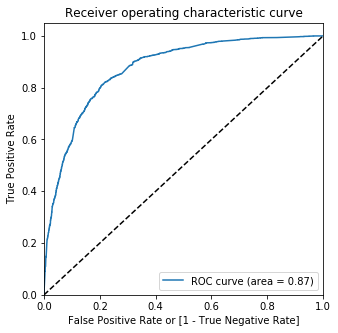

In [136]:
y_train_pred = model_1.predict(X_train_sm).values  

y_train_pred_df = pd.DataFrame({'Actual':y_train, 'Pred_Prob':y_train_pred})
y_train_pred_df['Lead number'] = lead_num_train.values
y_train_pred_df.head()

fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_df['Actual'], y_train_pred_df['Pred_Prob'], drop_intermediate = False )

draw_roc( y_train_pred_df['Actual'],y_train_pred_df['Pred_Prob'])

## `We have got a good ROC curve and AUC is also good . Let's check both sensitivity and specificity tradeoff , precision-recall curve`

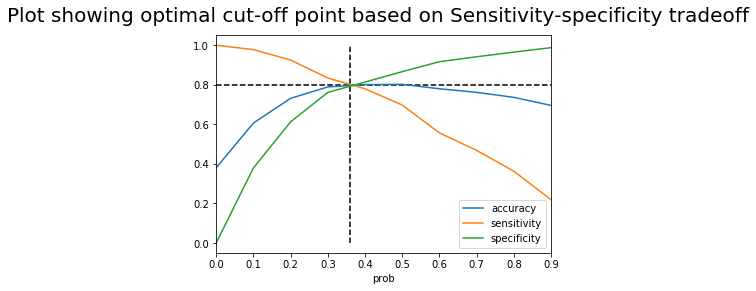

In [137]:
numbers = [float(x)/10 for x in range(10)] # 0.1 to 0.10
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df['Pred_Prob'].map(lambda x: 1 if x > i else 0)
    
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [float(x)/10 for x in range(10)]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_df['Actual'], y_train_pred_df[i] )
    total =sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    specificity = cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]

cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.vlines(x=0.36, ymax=1, ymin=0, colors="k", linestyles="--")
plt.hlines(y = 0.80,xmax=1, xmin=0, colors="k", linestyles="--")
plt.suptitle('Plot showing optimal cut-off point based on Sensitivity-specificity tradeoff' , size = 20 )
plt.subplots_adjust(hspace= 0.5)



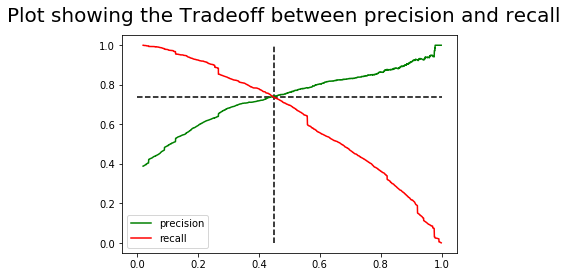

In [138]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_df['Actual'], y_train_pred_df['Pred_Prob'])

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.legend(['precision','recall'])
plt.vlines(x=0.45, ymax=1, ymin=0, colors="k", linestyles="--")
plt.hlines(y = 0.74,xmax=1, xmin=0, colors="k", linestyles="--")
plt.suptitle('Plot showing the Tradeoff between precision and recall' , size = 20 )
plt.subplots_adjust(hspace= 0.5)
plt.show()

# ` The goal of this model-B is building a stable model where all the metrics are to their optimum best. We need to take care of accuracy score first. In a general case scenerio the cut-off point can be determined using sensitivity and specificity tradeoff but if the requirements of the future change and according to the objectives of the business at that period the cut-off point can be changed`
## `For now lets you sensitivity-specificity tradeoff to determine cut-off (sensitivity is important)`

In [139]:
y_train_pred_df['final_predicted'] = y_train_pred_df['Pred_Prob'].map( lambda x: 1 if x >= 0.35 else 0)



## `Accuracy , Sensitivity and Specificity of train set`

In [140]:
metrics.accuracy_score(y_train_pred_df['Actual'], y_train_pred_df['final_predicted'])

0.7998102466793169

In [141]:
confusion_train = metrics.confusion_matrix(y_train_pred_df['Actual'], y_train_pred_df['final_predicted'] )
TP_train = confusion_train[1,1] # true positive 
TN_train = confusion_train[0,0] # true negatives
FP_train = confusion_train[0,1] # false positives
FN_train = confusion_train[1,0]

In [142]:
print('SENSITIVITY OF THE TRAIN IS '+  str(TP_train / float(TP_train+FN_train)))
print('SPECIFICITY OF THE TRAIN IS '+  str(TN_train / float(TN_train+FP_train)))

SENSITIVITY OF THE TRAIN IS 0.8085726175613817
SPECIFICITY OF THE TRAIN IS 0.794440193828105


## `Predictions, Accuracy , Sensitivity and Specificity on the test set`

In [143]:
X_test.head()

,A free copy of Mastering The Interview,Do Not Email,Page Views Per Visit,Total Time Spent on Website,TotalVisits,What_matters_BETTER_CAREER,Last Activity_Other,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,...,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Specialization_Info given
5150,0,0,1.098612,10,1.098612,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3800,1,0,1.386294,1146,1.386294,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
3589,1,0,2.079442,1495,2.708050,1,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6448,0,0,0.000000,0,0.000000,1,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
565,1,0,2.302585,888,2.302585,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [144]:
X_test[X_test.columns] = scaler.transform(X_test)
X_test = X_test[col]
X_test_sm = sm.add_constant(X_test)
X_test_sm = X_test_sm[X_train_sm.columns]

In [145]:
y_test_pred = model_1.predict(X_test_sm)
y_test_pred_df = pd.DataFrame({'Actual_TEST':y_test.values, 'Pred_Prob_TEST':y_test_pred})
y_test_pred_df['Lead number'] = lead_num_test.values
y_test_pred_df['test_final'] = y_test_pred_df['Pred_Prob_TEST'].map( lambda x: 1 if x >= 0.35 else 0)

y_test_pred_df.head()

,Actual_TEST,Pred_Prob_TEST,Lead number,test_final
5150,0,0.563520,610456,1
3800,1,0.300163,623651,0
3589,1,0.753123,626161,1
6448,0,0.266852,600547,0
565,1,0.495413,654434,1


In [146]:
metrics.accuracy_score(y_test_pred_df['Actual_TEST'], y_test_pred_df['test_final'])

0.783474732571007

In [147]:
confusion_test= metrics.confusion_matrix(y_test_pred_df['Actual_TEST'],  y_test_pred_df['test_final'])

TP_test = confusion_test[1,1] # true positive 
TN_test = confusion_test[0,0] # true negatives
FP_test = confusion_test[0,1] # false positives
FN_test = confusion_test[1,0] # false negatives

In [148]:
print('SENSITIVITY OF THE TEST IS '+  str(TP_test / float(TP_test+FN_test)))
print('SPECIFICITY OF THE TEST IS '+  str(TN_test / float(TN_test+FP_test)))

SENSITIVITY OF THE TEST IS 0.7703631010794897
SPECIFICITY OF THE TEST IS 0.791371158392435


# `Suggestion to the organisation:`

## There are many important variables like city, specialization , occupation which can potentially explain Conversion better. But , as a fact that these are provided as a optional entry for a lead while filling the form there were many missing values in these columns. It is important for the management to make few of these information mandatory to fill , so that we can use them better understand the 'customer' mindset and take build important decisions for the business